In [1]:
! pip install pandas numpy matplotlib seaborn 

/Users/hanvu/src/Python Projects/customer-segmentation-rfm/.venv/bin/pip: line 2: /Users/hanvu/src/Customer Segmentation/.venv/bin/python: No such file or directory
/Users/hanvu/src/Python Projects/customer-segmentation-rfm/.venv/bin/pip: line 2: exec: /Users/hanvu/src/Customer Segmentation/.venv/bin/python: cannot execute: No such file or directory


In [2]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta

# I. Data Quality Assessment (DQA) and Data Cleaning

We have four datasets that require thorough preparation
prior to performing exploratory data analysis and customer segmentation analysis. To ensure the quality and reliability of our findings, we will begin by gaining a comprehensive understanding of the data. Subsequently, we will undertake a meticulous cleaning process, which encompasses addressing missing values, identifying and managing outliers, standardizing the data, and converting it into a suitable format for analysis.

<h1>1. Customer Demographic<h1>

In [3]:
#Data loading
cust_demo = pd.read_csv('raw-data/CustomerDemographic.csv')

In [4]:
#Preview the dataset
cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,1-thg 2,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [5]:
cust_demo.shape

(4000, 13)

In [6]:
# Information of columns and data-types of Customer Demographics Data.
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In general, the dataset looks good. However, the `default` column looks irrelevant in terms of datatypes and content. Therefore, we should remove this field.

<h3>1. Dropping Irrelevent Columns<h3>

In [7]:
#Drop the 'Default' column
cust_demo.drop(labels={'default'}, axis=1 , inplace=True)

<h3>2. Missing Value Check<h3>



In [8]:
# Total number of missing values
cust_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

Now in this dataset, there are 5 columns: `last_name`, `DOB`, `job_title` , `job_industry_category`, `tenure` contain null (missing) values. We will identify the percentage of each type of missing values then decide an appropriate approach for each.

In [9]:
#Percentage of missing values
cust_demo.isnull().mean()*100

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
dtype: float64

<h4>2.1 Last name<h4>

In [10]:
# Verifying the existence of the last_name and customer_id that match to the null last_name
cust_demo[cust_demo['last_name'].isnull()][['first_name', 'customer_id']].isnull().sum()

first_name     0
customer_id    0
dtype: int64

As there is no missing value, it's good to ignore the missing last-name cells. We'll fill these missing values with "None"

In [11]:
# Fetching records where last name is missing
cust_demo[cust_demo['last_name'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
66,67,Vernon,NaN,Male,67,1960-06-14,Web Developer II,Retail,Mass Customer,N,No,18.0
105,106,Glyn,NaN,Male,54,1966-07-03,Software Test Engineer III,Health,High Net Worth,N,Yes,18.0
138,139,Gar,NaN,Male,1,1964-07-28,Operator,Telecommunications,Affluent Customer,N,No,4.0
196,197,Avis,NaN,Female,32,1977-01-27,NaN,NaN,High Net Worth,N,No,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3884,3885,Asher,NaN,Male,55,1978-06-17,Actuary,Financial Services,Mass Customer,N,Yes,8.0
3915,3916,Myrtia,NaN,Female,31,1958-10-17,NaN,Retail,Affluent Customer,N,Yes,17.0
3926,3927,Conway,NaN,Male,29,1978-01-07,Electrical Engineer,Manufacturing,Mass Customer,N,Yes,7.0
3961,3962,Benoit,NaN,Male,17,1977-10-06,Project Manager,Argiculture,High Net Worth,N,Yes,14.0


In [12]:
#Fill the null value with 'None'
cust_demo['last_name'].fillna('None',axis=0, inplace=True)

In [13]:
cust_demo['last_name'].isnull().sum()

np.int64(0)

Now all the null values in 'last_name' column have been replaced to 'None' successfully


<h4>2.2 Date of Birth<h4>

In [14]:
cust_demo[cust_demo['DOB'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
143,144,Jory,Barrabeale,U,71,NaN,Environmental Tech,IT,Mass Customer,N,No,NaN
167,168,Reggie,Broggetti,U,8,NaN,General Manager,IT,Affluent Customer,N,Yes,NaN
266,267,Edgar,Buckler,U,53,NaN,NaN,IT,High Net Worth,N,No,NaN
289,290,Giorgio,Kevane,U,42,NaN,Senior Sales Associate,IT,Mass Customer,N,No,NaN
450,451,Marlow,Flowerdew,U,37,NaN,Quality Control Specialist,IT,High Net Worth,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaN,NaN,IT,Affluent Customer,N,No,NaN
3882,3883,Nissa,Conrad,U,35,NaN,Legal Assistant,IT,Mass Customer,N,No,NaN
3930,3931,Kylie,Epine,U,19,NaN,NaN,IT,High Net Worth,N,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaN,NaN,IT,High Net Worth,N,Yes,NaN


As observed above, only around 2%  of data has null date of birth. With this small percentage, we can remove the records where date of birth is null.

In [15]:
# Drop rows where DOB is null
cust_demo = cust_demo.dropna(subset=['DOB'])
cust_demo.shape

(3913, 12)

In [16]:
cust_demo['DOB'].isnull().sum()

np.int64(0)

Now, we have dropped all rows which have null date of birth

***Checking the `Age` data discrepancy***

In [17]:
cust_demo['DOB'] = pd.to_datetime(cust_demo['DOB'])
cust_demo['Age'] = ((date.today() - cust_demo['DOB'].dt.date) / timedelta(days=365.2425)).astype(int)

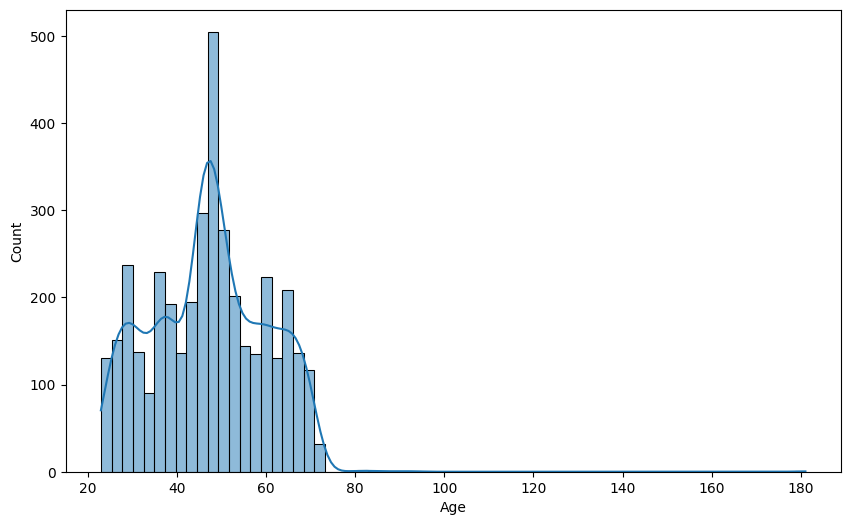

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=cust_demo, x='Age', kde=True)
plt.show()

We realized the range of this dataset is between around 20 to 180, we will check the statistics of the `Age` column

In [19]:
cust_demo['Age'].describe()

count    3913.000000
mean       47.178891
std        12.798150
min        23.000000
25%        38.000000
50%        47.000000
75%        57.000000
max       181.000000
Name: Age, dtype: float64

In this instance, we observe that there is only one customer, who is 181 years old. It is evident that this is an outlier, as the 75th percentile of age is 57.

In [20]:
#Showing unrealistic age list
unrealistic_age_records = cust_demo[cust_demo['Age'] > 100]
unrealistic_age_records

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,181


A client with an age of 181 can be seen here, which is an outlier. Consequently, it is necessary to eliminate this record.

In [21]:
cust_demo.drop(index=cust_demo[cust_demo['Age'] > 100].index, inplace=True)

In [22]:
cust_demo['Age'].describe()

count    3912.000000
mean       47.144683
std        12.619605
min        23.000000
25%        38.000000
50%        47.000000
75%        57.000000
max        93.000000
Name: Age, dtype: float64

Now we removed the outliers, therefore the max value of `Age` makes sense

<h4>2.3 Tenure<h4>

If the Date of Birth was empty the Tenure was also null. So, after getting rid of the empty DOBs, the empty tenures were also taken out of the dataframe.

In [23]:
#Check if there is any null 'tenure'
cust_demo['tenure'].isnull().sum()

np.int64(0)

The Tenure column does not have any null values.

<h4>2.4 Job Title<h4>


In [24]:
# Looking for records where Job Title is null
cust_demo[cust_demo['job_title'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
3,4,Talbot,None,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,63
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,58
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0,49
10,11,Uriah,Bisatt,Male,99,1954-04-30,NaN,Property,Mass Customer,N,No,9.0,70
21,22,Deeanne,Durtnell,Female,79,1962-12-10,NaN,IT,Mass Customer,N,No,11.0,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3968,Alexandra,Kroch,Female,99,1977-12-22,NaN,Property,High Net Worth,N,No,22.0,47
3971,3972,Maribelle,Schaffel,Female,6,1979-03-28,NaN,Retail,Mass Customer,N,No,8.0,45
3978,3979,Kleon,Adam,Male,67,1974-07-13,NaN,Financial Services,Mass Customer,N,Yes,18.0,50
3986,3987,Beckie,Wakeham,Female,18,1964-05-29,NaN,Argiculture,Mass Customer,N,No,7.0,60


Since 13% of jobs are missing, that's a substantial amount that we shouldn't take out of the collection. We will instead write "Missing" in place of null data.

In [25]:
cust_demo['job_title'].fillna('N/A', inplace=True, axis=0)

In [26]:
cust_demo['job_title'].isnull().sum()

np.int64(0)

<h4>2.5 Job Industry Category<h4>

In [27]:
#Find the null value of job_industry_category
cust_demo[cust_demo['job_industry_category'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,47
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0,62
15,16,Harlin,Parr,Male,38,1977-02-27,Media Manager IV,NaN,Mass Customer,N,Yes,18.0,48
16,17,Heath,Faraday,Male,57,1962-03-19,Sales Associate,NaN,Affluent Customer,N,Yes,15.0,62
17,18,Marjie,Neasham,Female,79,1967-07-06,Professor,NaN,Affluent Customer,N,No,11.0,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,3966,Astrix,Sigward,Female,53,1968-09-15,Geologist I,NaN,Mass Customer,N,Yes,11.0,56
3973,3974,Misha,Ranklin,Female,82,1961-02-11,Technical Writer,NaN,Affluent Customer,N,Yes,9.0,64
3975,3976,Gretel,Chrystal,Female,0,1957-11-20,Internal Auditor,NaN,Affluent Customer,N,Yes,13.0,67
3982,3983,Jarred,Lyste,Male,19,1965-04-21,Graphic Designer,NaN,Mass Customer,N,Yes,9.0,59


The same as we did with `job_title`, we will fill in the null value with 'N/A'

In [28]:
cust_demo['job_industry_category'].fillna('N/A', inplace=True, axis=0)

In [29]:
#Check if there is any null value left
cust_demo['job_industry_category'].isnull().sum()

np.int64(0)

Finally, we reviewed all the null data.

<h3>3. Data Inconsistency Check<h3>

We will verify the presence of conflicting data or typographical errors in the categorical columns. The columns for examination are `gender`, `wealth_segment`, `deceased_indicator`, and `owns_car`.

<h4>3.1 Gender<h4>

In [30]:
cust_demo['gender'].value_counts()

gender
Female    2037
Male      1872
F            1
Femal        1
M            1
Name: count, dtype: int64

Currently, we observe different forms of 'gender'; only 'U' is irrelevant. We shall consider discarding this record due to its insignificance. At the same time, we will convert `F` to `Female` and `M` to `Male`

In [31]:
cust_demo['gender'] = cust_demo['gender'].str[0].map({'M': 'Male', 'F': 'Female'})

In [32]:
cust_demo['gender'].value_counts()

gender
Female    2039
Male      1873
Name: count, dtype: int64

<h4>3.2 Wealth Segment<h4>

In [33]:
cust_demo['wealth_segment'].value_counts()

wealth_segment
Mass Customer        1954
High Net Worth        996
Affluent Customer     962
Name: count, dtype: int64

There is no inconsistent data in `wealth_segment` column.

<h4>3.3 Deceased Indicator<h4>

In [34]:
cust_demo['deceased_indicator'].value_counts()

deceased_indicator
N    3910
Y       2
Name: count, dtype: int64

There is no inconsistent data in `deceased_indicator` column.

<h4>3.4 Owns a Car<h4>

In [35]:
cust_demo['owns_car'].value_counts()

owns_car
Yes    1974
No     1938
Name: count, dtype: int64

There is no inconsistent data in `owns_car` column.

<h3>4. Duplication Checks<h3>

In [36]:
#Check for duplicate rows
print("Number of duplicate rows:", cust_demo.duplicated().sum())

Number of duplicate rows: 0


There is no duplicated data in value in this dataset

<h1>2. New Customer List<h1>

In [37]:
#Data loading
new_cust = pd.read_csv('raw-data/NewCustomerList.csv')

In [38]:
#Preview the dataset
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,"0,57","0,7125","0,890625","0,75703125",1,1,"1,71875"
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,"0,85","0,85","1,0625","0,903125",1,1,"1,71875"
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,"0,96","0,96","0,96","0,96",1,1,"1,71875"
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,"0,42","0,525","0,525","0,525",4,4,"1,703125"
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,"0,73","0,73","0,9125","0,9125",4,4,"1,703125"


In [39]:
#Show the data types of each column.
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   first_name                           1000 non-null   object
 1   last_name                            971 non-null    object
 2   gender                               1000 non-null   object
 3   past_3_years_bike_related_purchases  1000 non-null   int64 
 4   DOB                                  983 non-null    object
 5   job_title                            894 non-null    object
 6   job_industry_category                835 non-null    object
 7   wealth_segment                       1000 non-null   object
 8   deceased_indicator                   1000 non-null   object
 9   owns_car                             1000 non-null   object
 10  tenure                               1000 non-null   int64 
 11  address                              1000 no

We recognize that there are 5 irrelevant columns: `Unnamed: 16``Unnamed: 17``Unnamed: 18` `Unnamed: 19` and `Unnamed: 20`. Therefore, we will drop these 5 fields.

<h3>1. Dropping Irrelevent Columns<h3>

In [40]:
new_cust.drop(labels=['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis=1 , inplace=True)

<h3>2. Missing Values Check<h3>

In [41]:
# Percentage of missing values
new_cust.isnull().mean()*100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Rank                                    0.0
Value                                   0.0
dtype: float64

Only a few of columns contain null values such as `last_name` ,`DOB`, `job_title` and `job_industry_category`

<h4>2.1 Last name<h4>

All consumers are identifiable due to the fact that they already have a first name. Therefore, it is acceptable to disregard a last name. Filling in null last names with "None"

In [42]:
new_cust[new_cust['last_name'].isnull()][['first_name']].isnull().sum()

first_name    0
dtype: int64

In [43]:
#Display a list contains null 'last_name'
new_cust[new_cust['last_name'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
12,Olag,NaN,Male,60,1990-05-13,Human Resources Manager,Telecommunications,Mass Customer,N,No,9,0484 North Avenue,2032,NSW,Australia,11,13,"1,609375"
58,Whittaker,NaN,Male,64,1966-07-29,Media Manager III,NaN,Mass Customer,N,Yes,8,683 Florence Way,3156,VIC,Australia,5,57,"1,375"
87,Kahaleel,NaN,Male,5,1942-11-01,GIS Technical Architect,NaN,High Net Worth,N,No,13,12 Arapahoe Park,2035,NSW,Australia,12,88,"1,31484375"
155,Bill,NaN,Female,74,1963-04-24,Human Resources Assistant II,Property,Mass Customer,N,Yes,19,6704 Pine View Lane,2170,NSW,Australia,9,155,"1,2"
202,Glyn,NaN,Male,47,1945-02-13,General Manager,Manufacturing,Affluent Customer,N,Yes,21,67 Bluejay Plaza,2300,NSW,Australia,9,202,"1,140625"
326,Haleigh,NaN,Female,17,1952-05-19,Senior Sales Associate,Financial Services,Mass Customer,N,Yes,18,49 Jana Point,4503,QLD,Australia,4,326,"1,009375"
330,Alon,NaN,Male,17,1999-06-23,Accountant IV,NaN,Affluent Customer,N,No,9,770 Crest Line Parkway,4218,QLD,Australia,3,329,1
357,Otis,NaN,Male,59,1971-01-11,Electrical Engineer,Manufacturing,Affluent Customer,N,No,12,04 Oakridge Plaza,2075,NSW,Australia,11,358,"0,98"
419,Sherill,NaN,Female,33,1991-12-18,Information Systems Manager,Financial Services,Mass Customer,N,No,3,53 Moulton Avenue,2880,NSW,Australia,1,420,"0,91375"
442,Theresina,NaN,Female,30,1987-03-01,General Manager,Argiculture,Mass Customer,N,Yes,14,253 Katie Junction,2650,NSW,Australia,2,441,"0,901"


In [44]:
#Fill in these null value with 'None'
new_cust['last_name'].fillna('None',axis=0, inplace=True)

In [45]:
#Check if the null values still exist
new_cust['last_name'].isnull().sum()

np.int64(0)

Now we are sure that there is no null value in `last_name` column.

<h4>2.2 Date of Birth<h4>

In [46]:
#Display a list contains null 'DOB'
new_cust[new_cust['DOB'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
59,Normy,Goodinge,U,5,NaN,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,"1,375"
226,Hatti,Carletti,U,35,NaN,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,"1,1125"
324,Rozamond,Turtle,U,69,NaN,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,"1,01"
358,Tamas,Swatman,U,65,NaN,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,"0,98"
360,Tracy,Andrejevic,U,71,NaN,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,"0,9775"
374,Agneta,McAmish,U,66,NaN,Structural Analysis Engineer,IT,Mass Customer,N,No,15,5773 Acker Way,4207,QLD,Australia,6,375,"0,96"
434,Gregg,Aimeric,U,52,NaN,Internal Auditor,IT,Mass Customer,N,No,7,72423 Surrey Street,3753,VIC,Australia,5,433,"0,90625"
439,Johna,Bunker,U,93,NaN,Tax Accountant,IT,Mass Customer,N,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,436,"0,903125"
574,Harlene,Nono,U,69,NaN,Human Resources Manager,IT,Mass Customer,N,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,575,"0,796875"
598,Gerianne,Kaysor,U,15,NaN,Project Manager,IT,Affluent Customer,N,No,5,882 Toban Lane,2121,NSW,Australia,11,599,"0,775"


Only 2% of the data contains a null date of birth. We can eliminate the records with a null date of birth.

In [47]:
#Drop the null value in DOB column
new_cust = new_cust.dropna(subset=['DOB'])

In [48]:
new_cust['DOB'].isnull().sum()

np.int64(0)

Now, there is no null value in `DOB` column.

**Create 'Age' column to check its discrepancy**

In [49]:
new_cust['DOB'] = pd.to_datetime(new_cust['DOB'])
new_cust['Age'] = ((pd.Timestamp.today() - new_cust['DOB']).dt.days / 365.25).astype(int)

**Descriptive Statistics of Age column**

In [50]:
new_cust['Age'].describe()

count    983.000000
mean      53.420142
std       17.058229
min       23.000000
25%       41.500000
50%       52.000000
75%       67.000000
max       86.000000
Name: Age, dtype: float64

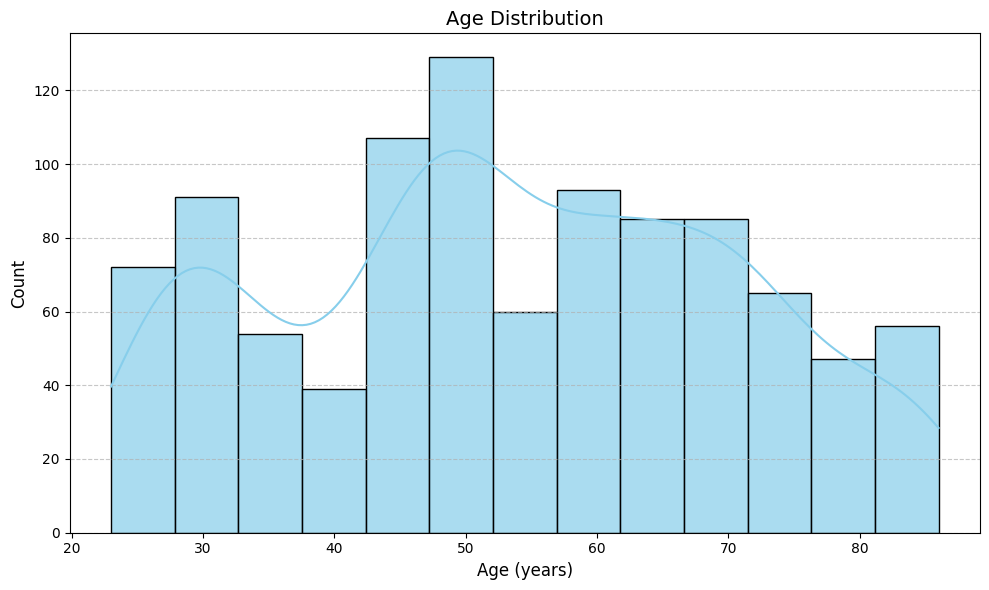

In [51]:
#Visualize 'Age' into histogram chart
plt.figure(figsize=(10, 6))
sns.histplot(data=new_cust, x='Age', kde=True, color='skyblue', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

plt.show()

**Create Age Group Column**

In [52]:
new_cust['Age Group'] = new_cust['Age'].apply(lambda x : (math.floor(x/10)+1)*10)

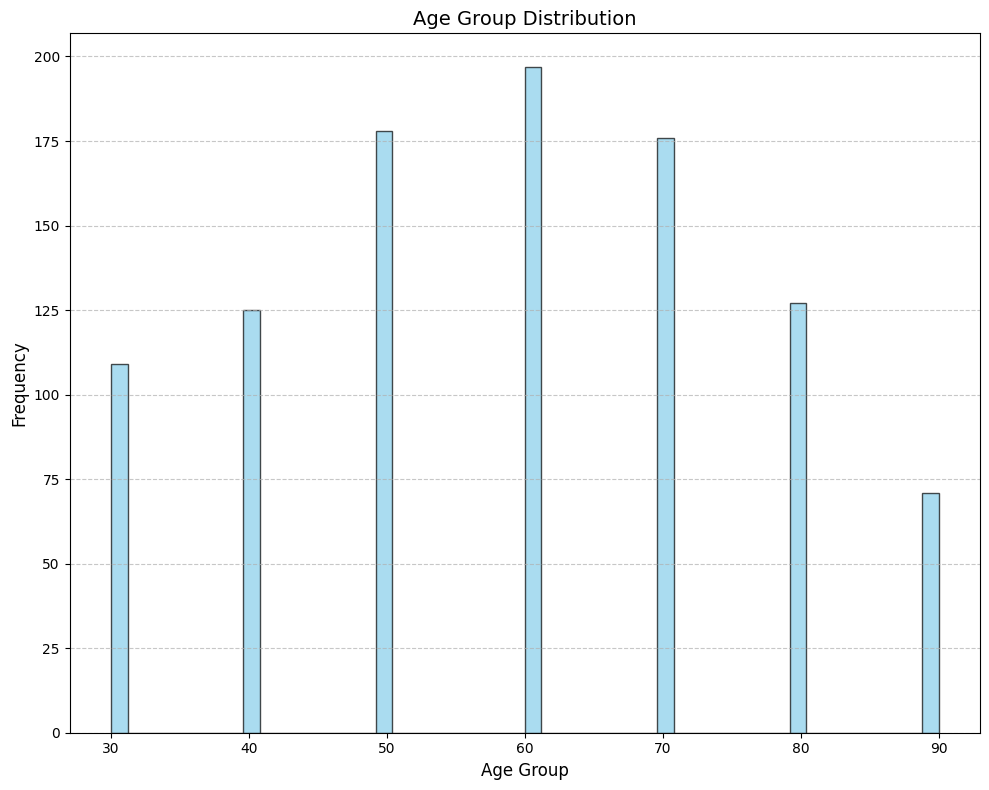

In [53]:
plt.figure(figsize=(10, 8))
plt.hist(new_cust['Age Group'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Age Group Distribution', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The age group of **50-59** represents the greatest number of new customers.

<h4>2.3 Job Title<h4>

In [54]:
new_cust[new_cust['job_title'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age Group
15,Dukie,Swire,Male,88,1954-03-31,NaN,Manufacturing,Affluent Customer,N,Yes,5,64 Granby Parkway,2500,NSW,Australia,8,16,"1,5625",70,80
25,Rourke,Gillbard,Male,11,1945-08-03,NaN,Property,Mass Customer,N,No,17,75 Cordelia Trail,4817,QLD,Australia,4,26,"1,46875",79,80
29,Rhona,De Freyne,Female,45,1960-11-22,NaN,Health,High Net Worth,N,No,8,11184 East Drive,3056,VIC,Australia,10,30,"1,4609375",64,70
30,Sharron,Claibourn,Female,62,1980-01-26,NaN,Financial Services,High Net Worth,N,Yes,17,555 Hermina Avenue,2280,NSW,Australia,8,30,"1,4609375",45,50
37,Mitchell,MacCague,Male,58,1979-04-11,NaN,Manufacturing,Mass Customer,N,No,15,240 Acker Avenue,3190,VIC,Australia,8,38,"1,4375",45,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,Candy,None,Female,23,1977-12-08,NaN,Financial Services,Mass Customer,N,No,6,59252 Maryland Drive,3500,VIC,Australia,3,951,"0,4505",47,50
953,Noami,Cokly,Female,74,1962-09-17,NaN,Manufacturing,Mass Customer,N,Yes,15,2886 Buena Vista Terrace,2038,NSW,Australia,11,954,"0,45",62,70
971,Frieda,Tavinor,Female,43,1999-03-04,NaN,NaN,Affluent Customer,N,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,"0,43",26,30
972,Ellwood,Budden,Male,82,1998-06-03,NaN,Health,Mass Customer,N,Yes,11,79907 Randy Center,2192,NSW,Australia,10,972,"0,43",26,30


Given that the Job Title has an 11% percentage of absent values, **'N/A'** values will be used to replace them

In [55]:
new_cust['job_title'].fillna('N/A', inplace=True, axis=0)

In [56]:
new_cust['job_title'].isnull().sum()

np.int64(0)

Now there are no missing values for Job Title Column.

<h4>2.4 Job Industry Category<h4>

In [57]:
new_cust[new_cust['job_industry_category'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age Group
22,Otis,Ottey,Male,26,1998-02-05,Quality Engineer,NaN,Mass Customer,N,No,3,1562 Merchant Street,4744,QLD,Australia,4,23,"1,5",27,30
23,Tabbatha,Averill,Female,5,1977-12-17,Quality Control Specialist,NaN,Affluent Customer,N,Yes,13,663 8th Parkway,2257,NSW,Australia,8,23,"1,5",47,50
33,Mikel,McNess,Male,71,1981-09-22,Nurse,NaN,Mass Customer,N,No,9,3 Pleasure Drive,4122,QLD,Australia,9,32,"1,453125",43,50
36,Farlie,Petford,Male,76,1968-03-25,Recruiting Manager,NaN,High Net Worth,N,No,13,2330 Butternut Trail,2017,NSW,Australia,10,36,"1,44765625",56,60
43,Corinna,Suggey,Female,52,1966-09-18,Design Engineer,NaN,Affluent Customer,N,No,9,938 Ilene Road,2761,NSW,Australia,8,44,"1,42109375",58,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Blondell,Dibdall,Female,62,1967-01-03,Programmer III,NaN,Mass Customer,N,No,4,34 Bunting Pass,3048,VIC,Australia,4,960,"0,442",58,60
971,Frieda,Tavinor,Female,43,1999-03-04,N/A,NaN,Affluent Customer,N,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,"0,43",26,30
975,Amby,Bodega,Male,63,1968-06-12,Recruiter,NaN,Affluent Customer,N,Yes,17,669 Declaration Street,3810,VIC,Australia,6,974,"0,425",56,60
980,Tyne,Anshell,Female,71,1992-04-08,Mechanical Systems Engineer,NaN,Mass Customer,N,Yes,3,93 Sutherland Terrace,2560,NSW,Australia,8,979,"0,4165",32,40


Given that the percentage of job industry categories that are absent is 16%. Null values will be replaced with 'N/A'.

In [58]:
new_cust['job_industry_category'].fillna('N/A', inplace=True, axis=0)

In [59]:
new_cust['job_industry_category'].isnull().sum()

np.int64(0)

At last, the dataset is devoid of null values.

In [60]:
new_cust.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
Age                                    0
Age Group                              0
dtype: int64

In [61]:
print("Total records after removing null values: {}".format(new_cust.shape[0]))

Total records after removing null values: 983


<h3>3. Data Inconsistency Check<h3>

In [62]:
new_cust

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age Group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,"1,71875",67,70
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,"1,71875",54,60
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,"1,71875",50,60
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,"1,703125",46,50
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,"1,703125",59,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,"0,374",65,70
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,"0,357",23,30
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,"0,357",70,80
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,"0,357",72,80


`gender`, `weath_segment`, `owns_car`, `state`, `country`, and `tenure` are the features that will be examined

<h4>3.1 Gender<h4>

In [63]:
new_cust['gender'].value_counts()

gender
Female    513
Male      470
Name: count, dtype: int64

The `gender` column contains no inconsistent data.

<h4>3.2 Wealth Segment<h4>

In [64]:
new_cust['wealth_segment'].value_counts()

wealth_segment
Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: count, dtype: int64

The `wealth_segment` column contains no inconsistent data.

<h4>3.3 Owns a Car<h4>

In [65]:
new_cust['owns_car'].value_counts()

owns_car
No     497
Yes    486
Name: count, dtype: int64

There is no inconsistent data in `owns_car` column.

<h4>3.4 State<h4>

In [66]:
new_cust['state'].value_counts()

state
NSW    499
VIC    258
QLD    226
Name: count, dtype: int64

There is no inconsistent data in `state` column.

<h4>3.5 Country<h4>

In [67]:
new_cust['country'].value_counts()

country
Australia    983
Name: count, dtype: int64

There is no inconsistent data in `country` column.

<h4>3.6 Tenure<h4>

In [68]:
new_cust['tenure'].describe()

count    983.000000
mean      11.459817
std        5.006123
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

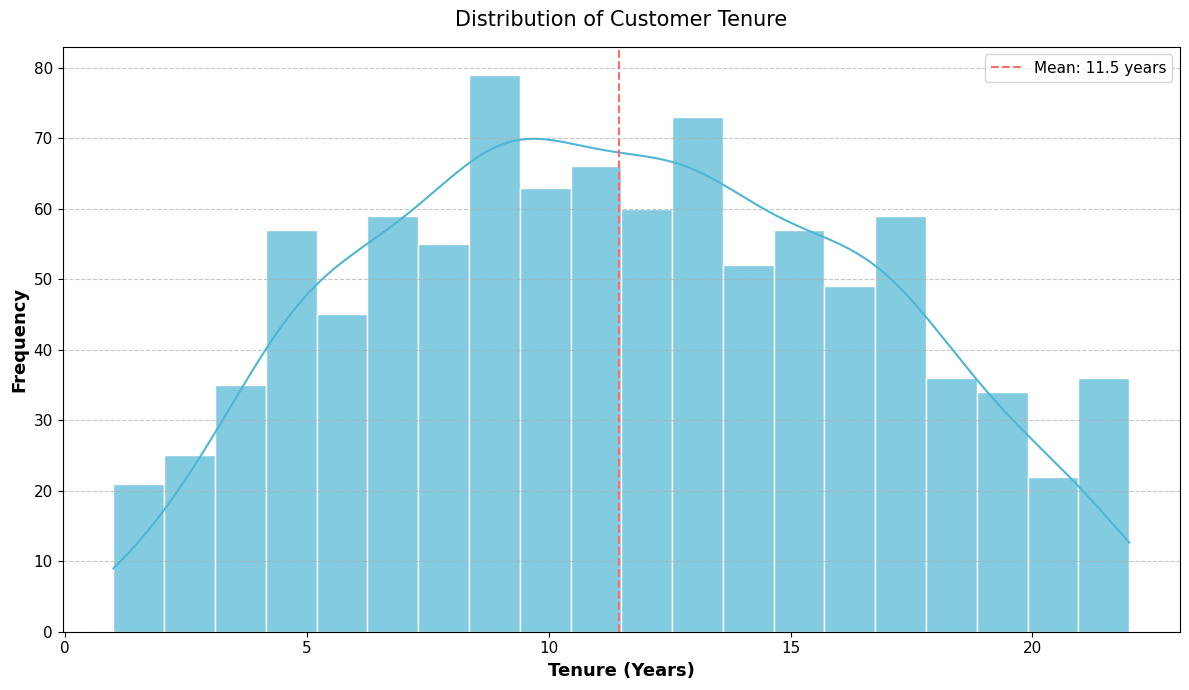

In [69]:
plt.figure(figsize=(12, 7))
sns.histplot(data=new_cust, x='tenure', kde=True, 
             color='#4FB6D3', edgecolor='white', alpha=0.7,
             bins=20)
plt.xlabel('Tenure (Years)', fontsize=13, fontweight='bold')
plt.ylabel('Frequency', fontsize=13, fontweight='bold')
plt.title('Distribution of Customer Tenure', fontsize=15, pad=15)

# Style the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tick_params(axis='both', labelsize=11)

# Add mean line
mean_tenure = new_cust['tenure'].mean()
plt.axvline(x=mean_tenure, color='#FF6B6B', linestyle='--', 
            label=f'Mean: {mean_tenure:.1f} years')
plt.legend(fontsize=11)

plt.tight_layout()
plt.show()

Comments:

<h3>4. Duplication Checks<h3>


In [70]:
# Check for duplicates
duplicates_count = new_cust.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 0


As can be seen, the dataset is free of duplication

<h2>3. Transaction Data<h2>

In [71]:
#Data loading
trans = pd.read_csv('raw-data/transactions.csv')

In [72]:
#Preview data
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2/25/2017,False,Approved,Solex,Standard,medium,medium,"71,49","$53,62",41245.0
1,2,3,3120,5/21/2017,True,Approved,Trek Bicycles,Standard,medium,large,"2091,47","$388,92",41701.0
2,3,37,402,10/16/2017,False,Approved,OHM Cycles,Standard,low,medium,"1793,43","$248,82",36361.0
3,4,88,3135,8/31/2017,False,Approved,Norco Bicycles,Standard,medium,medium,"1198,46","$381,10",36145.0
4,5,78,787,10/1/2017,True,Approved,Giant Bicycles,Standard,medium,large,"1765,3","$709,48",42226.0


In [73]:
trans.shape

(20000, 13)

In [74]:
#Information of data types
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  object 
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 2.0+ MB


The datatype of the **`transaction_date`** and **`product_first_sold_date`** columns is not in datetime format. The data type of these columns must be converted from **int64** to **datetime** format.

In [75]:
trans['product_first_sold_date'] = pd.to_datetime(trans['product_first_sold_date'])
trans['transaction_date'] = pd.to_datetime(trans['transaction_date'])

<h3>1. Missing Values Check<h3>

In [76]:
# Percentage of missing values
trans.isnull().mean()*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

Here it is observed that columns like `online_order`, `brand`, `product_line`, `product_class` , `product_size`, `standard_cost`, `product_first_sold_date` have missing values.

<h4>1.1 Online Order<h4>

Given that 1.8% of the records lack online_order data, we can use mode value to fill in null values for this categorical variable.

In [77]:
online_order_mode = trans['online_order'].mode()
online_order_mode

0    True
Name: online_order, dtype: object

In [78]:
trans['online_order'].fillna(True, inplace=True)
trans['online_order'].isnull().sum()

np.int64(0)

In [79]:
trans['online_order'].unique()

array([False,  True])

Now there are no missing values in `online_order` column anymore

<h4>1.2 Brand, Product Line, Product Class, Product Size, Standard Cost and Product First Sold Date columns<h4>


When the `brand` column is empty, the other columns: `product_line`, `product_class`, `product_size`, `standard_cost` and `product_first_sold_date` are also empty. These missing values make up 1% of the dataset, so we can remove these rows

In [80]:
trans.dropna(subset=['brand', 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date'], inplace=True)

In [81]:
trans.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

Now, there are no missing values in this transaction data now

In [82]:
print("Total rows after removing missing values:", trans.shape[0])

Total rows after removing missing values: 19803


<h3>2. Create new `Profit` column (feature extraction)<h3>

In [83]:
trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,"71,49","$53,62",1970-01-01 00:00:00.000041245
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,"2091,47","$388,92",1970-01-01 00:00:00.000041701
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,"1793,43","$248,82",1970-01-01 00:00:00.000036361
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,"1198,46","$381,10",1970-01-01 00:00:00.000036145
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,"1765,3","$709,48",1970-01-01 00:00:00.000042226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,"2005,66","$1.203,40",1970-01-01 00:00:00.000037823
19996,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,"416,98","$312,74",1970-01-01 00:00:00.000035560
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,"1636,9","$44,71",1970-01-01 00:00:00.000040410
19998,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,"227,88","$136,73",1970-01-01 00:00:00.000038216


In [84]:
# Convert comma to period in list_price and convert to float
trans['list_price'] = trans['list_price'].str.replace(',', '.').astype(float)

# Remove $ sign and convert comma/period format in standard_cost
trans['standard_cost'] = trans['standard_cost'].str.replace('$', '').str.replace('.', '').str.replace(',', '.').astype(float)

# Calculate profit as list_price minus standard_cost
trans['profit'] = trans['list_price'] - trans['standard_cost']


In [85]:
trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000041245,17.87
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 00:00:00.000041701,1702.55
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 00:00:00.000036361,1544.61
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 00:00:00.000036145,817.36
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 00:00:00.000042226,1055.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01 00:00:00.000037823,802.26
19996,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,1970-01-01 00:00:00.000035560,104.24
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1970-01-01 00:00:00.000040410,1592.19
19998,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01 00:00:00.000038216,91.15


Plot histogram to show distribution of this `profit` column

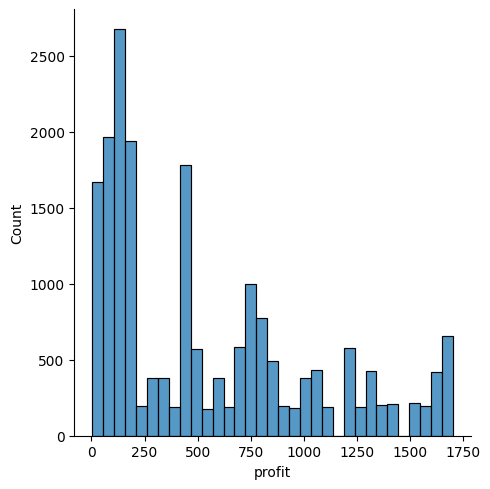

In [86]:
sns.displot(data=trans, x='profit')

<h3>3. Data Inconsistency Check<h3>

In [87]:
trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000041245,17.87
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 00:00:00.000041701,1702.55
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 00:00:00.000036361,1544.61
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 00:00:00.000036145,817.36
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 00:00:00.000042226,1055.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01 00:00:00.000037823,802.26
19996,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,1970-01-01 00:00:00.000035560,104.24
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1970-01-01 00:00:00.000040410,1592.19
19998,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01 00:00:00.000038216,91.15


We will check these columns: `online_order`, `order_status` , `product_line`, `product_class`, `product_size` and `brand` to see if there's any data inconsistency

<h4>3.1 online_order<h4>

In [88]:
trans['online_order'].value_counts()

online_order
True     10097
False     9706
Name: count, dtype: int64

No inconsistency here

<h4>3.2 order_status<h4>

In [89]:
trans['order_status'].value_counts()

order_status
Approved     19625
Cancelled      178
Name: count, dtype: int64

In [90]:
trans[['order_status', 'online_order']].drop_duplicates()

,order_status,online_order
0,Approved,False
1,Approved,True
42,Cancelled,False
254,Cancelled,True


No inconsistent data for `order_status` as well

<h4>3.3 product_line<h4>

In [91]:
trans['product_line'].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

No inconsistency as well

<h4>3.4 product_class<h4>

In [92]:
trans['product_class'].value_counts()

product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

No inconsistent data here as well

<h4>3.5 product_size<h4>

In [93]:
trans['product_size'].value_counts()

product_size
medium    12990
large      3976
small      2837
Name: count, dtype: int64

No inconsistent data here as well

<h4>3.6 brand<h4>

In [94]:
trans['brand'].value_counts()

brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

No inconsistent data here too

<h3>4. Duplication Checks<h3>

We will check if transaction data has duplicated rows based on primary key column, which is `transaction_id`

In [95]:
trans.to_csv('transaction.csv', index=False)


In [96]:
trans['transaction_id'].duplicated().sum()

np.int64(0)

As can be seen, there is no duplicates here in this dataset

<h1>4. Customer Address<h1>

In [97]:
#Loading data
cust_add = pd.read_csv('raw-data/CustomerAddress.csv')

In [98]:
#Preview
cust_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [99]:
cust_add.shape

(3999, 6)

In [100]:
# Information of columns and data-types of Customer Address Data.
cust_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


<h3>1. Missing Values Check<h3>

In [101]:
cust_add.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

There is no null value in this dataset, therefore, we can move forward to the next step.

<h3>2. Data Inconsistency Check<h3>

<h4>2.1 State<h4>

In [102]:
cust_add['state'].value_counts()

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

There is inconsistency, the 'New South Wales' and NSW represent for the same meaning. The same thing happen for 'VIC' and 'Victoria'. In this case , I will make the 'New South Wales' to 'NSW' and 'Victoria' to 'VIC'

In [103]:
#Standardize State code
cust_add['state'] = cust_add['state'].replace({'New South Wales': 'NSW', 'Victoria': 'VIC'})

In [104]:
#Verify after apply new rule
cust_add['state'].value_counts()

state
NSW    2140
VIC    1021
QLD     838
Name: count, dtype: int64

<h4>2.2 Country<h4>

In [105]:
cust_add['country'].value_counts()

country
Australia    3999
Name: count, dtype: int64

There is no inconsistency of data in the `Country` column.

<h3>3. Duplication Checks<h3>

In [106]:
trans.duplicated().sum()

np.int64(0)

As can be seen, the dataset is free of duplication

<h1>II. Exploratory Data Analysis (EDA) on Customer Segments<h1>

Exploratory data analysis (EDA) plays a critical role by providing a foundational understanding of the dataset prior to modeling. The primary purpose of EDA in this context is to uncover patterns, trends, and relationships within customer data—such as demographics, purchasing behavior, and preferences—that could inform segmentation strategies.

<h2>1. Demographics<h2>

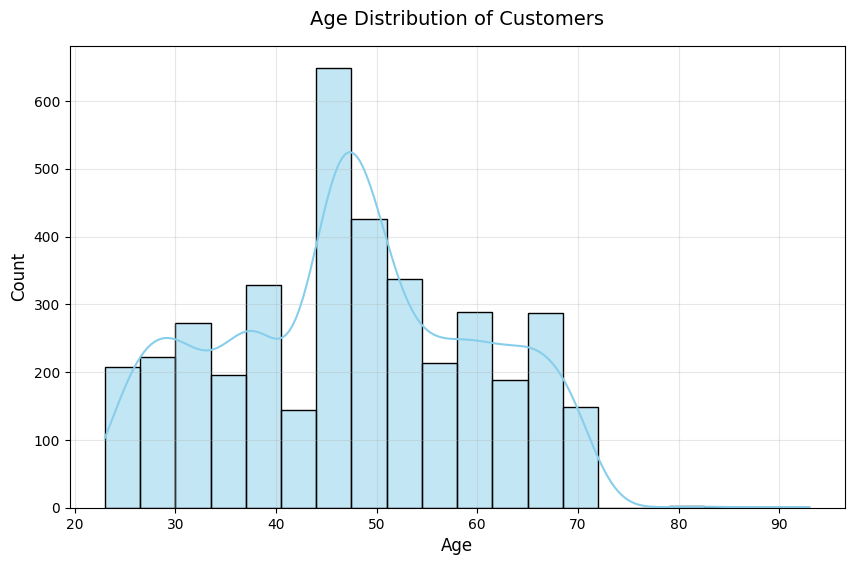

In [107]:
#Age Distribution of Customers
plt.figure(figsize=(10,6))
sns.histplot(cust_demo['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution of Customers', fontsize=14, pad=15)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.grid(alpha=0.3)

Insight:
- Most of the customers are aged between 45 - 55 years old, with the highest peak around 50 years old.
--> adult in the middle age are the main concentration and is likely the most responsive to marketing campaigns and should be prioritized for premium or loyalty-based offers.

- Moderate number of customers between 30-40 years old and 60-70 years old, indicating that the company serves both younger and older demographics
--> The company has limited appeal to very young or elderly customers.

--> The concentration of customers are those who still in the độ tuổi lao động, trung niên

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]),
 [Text(0, 0.0, '0'),
  Text(0, 250.0, '250'),
  Text(0, 500.0, '500'),
  Text(0, 750.0, '750'),
  Text(0, 1000.0, '1000'),
  Text(0, 1250.0, '1250'),
  Text(0, 1500.0, '1500'),
  Text(0, 1750.0, '1750'),
  Text(0, 2000.0, '2000'),
  Text(0, 2250.0, '2250')])

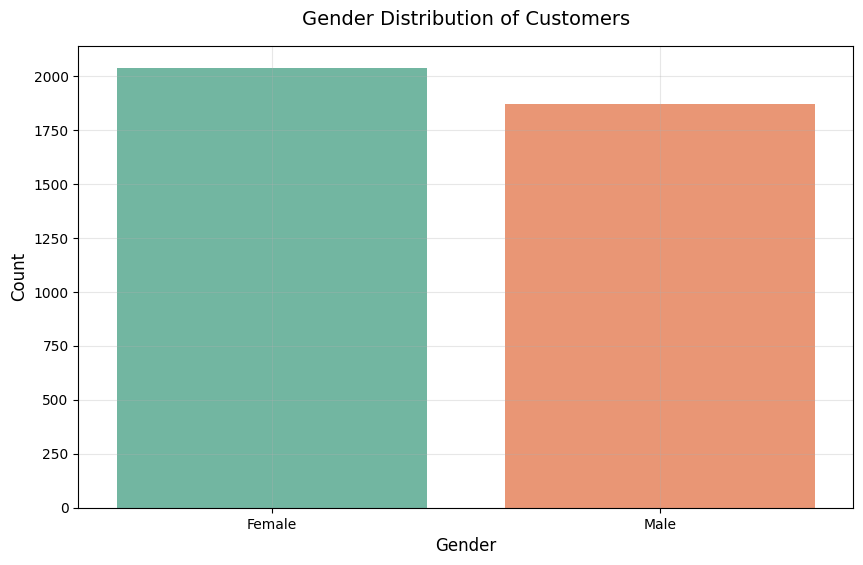

In [108]:
#Gender Distribution of Customers
plt.figure(figsize=(10,6))
sns.countplot(data=cust_demo, x='gender', palette='Set2')
plt.title('Gender Distribution of Customers', fontsize=14, pad=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

- The difference between male and female customers is not significantly
--> Do not have to follow the gender-specific appeal for segmentation

Text(0.5, 1.0, 'Distribution of Customer Wealth Segments')

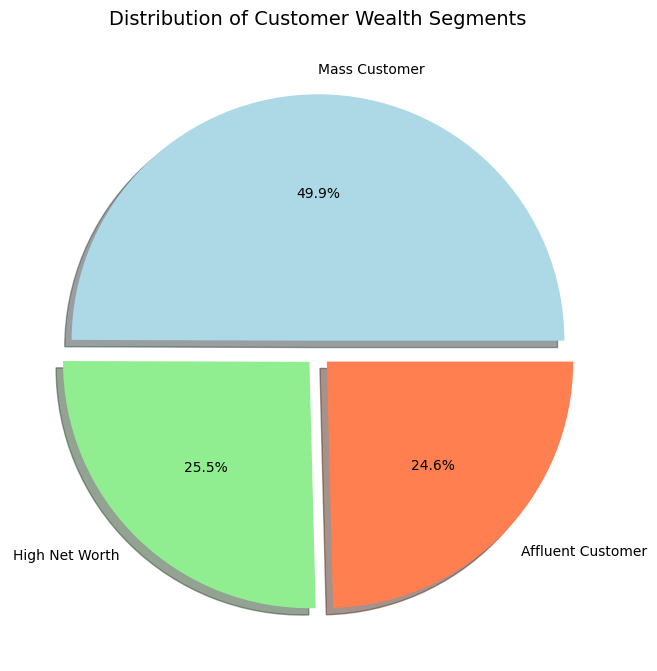

In [109]:
#Distribution of Customer Wealth Segments
plt.figure(figsize=(10,8))
plt.pie(cust_demo['wealth_segment'].value_counts(), 
        labels=cust_demo['wealth_segment'].value_counts().index,
        autopct='%1.1f%%',
        colors=['lightblue', 'lightgreen', 'coral'],
        explode=(0.05, 0.05, 0.05),
        shadow=True)
plt.title('Distribution of Customer Wealth Segments', fontsize=14, pad=15)

- The majority of customers belong to the Mass Customer
--> Middle-income customers
--> primary focus for broad-market products and competitive pricing strategies


Mass Customers: Develop cost-effective financial products and digital banking solutions to retain this large customer base.
Affluent & High Net Worth Customers: Introduce personalized services, and premium relationship management to cater to their needs.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Health'),
  Text(0, 1, 'Financial Services'),
  Text(0, 2, 'Property'),
  Text(0, 3, 'IT'),
  Text(0, 4, 'N/A'),
  Text(0, 5, 'Retail'),
  Text(0, 6, 'Argiculture'),
  Text(0, 7, 'Manufacturing'),
  Text(0, 8, 'Telecommunications'),
  Text(0, 9, 'Entertainment')])

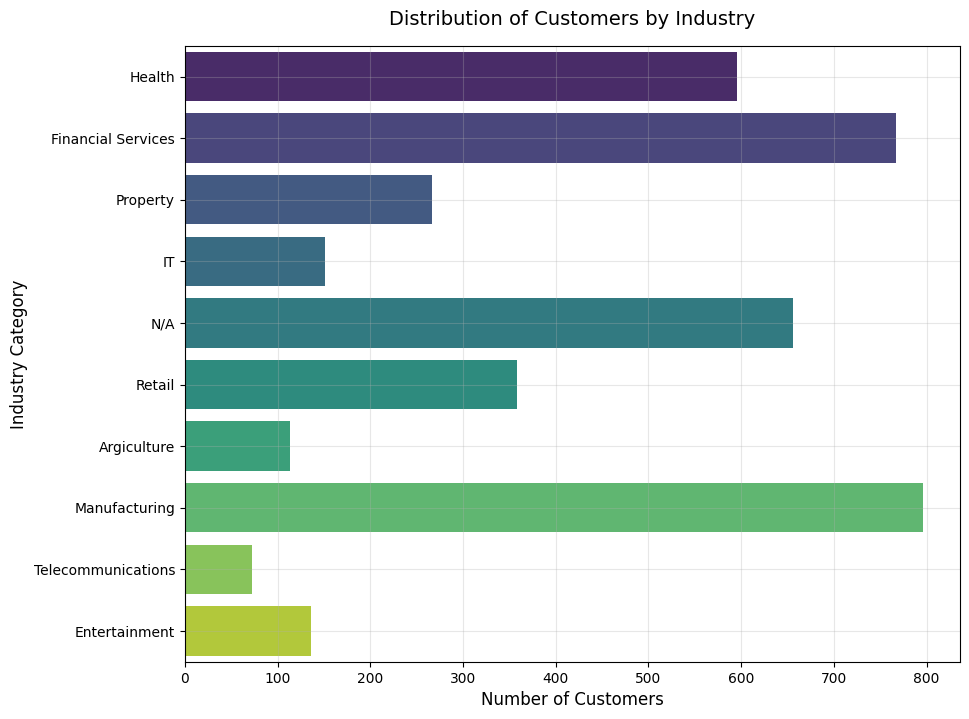

In [110]:
#Distribution of customer by industry
plt.figure(figsize=(10,8))
sns.countplot(data=cust_demo, y='job_industry_category', palette='viridis')
plt.title('Distribution of Customers by Industry', fontsize=14, pad=15)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Industry Category', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

- Most customers work in Manufacturing, Financial Services and Health industries --> Blue-collar workers, actively engaging with the products, possibly due to financial stability and spending power.
- Telecommunications and Agriculture have the lowest customer --> limit engagement and awareness to this sector

--> Nhìn chung là mí người ngồi văn phòng hoặc làm business thì mới quan tâm tới automobile do tiện cho họ, còn mí người làm nông nghiệp hay viễn thông thì không quan tâm tới cí này.

<h2>2. Customer Address<h2>

In [111]:
cust_add

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


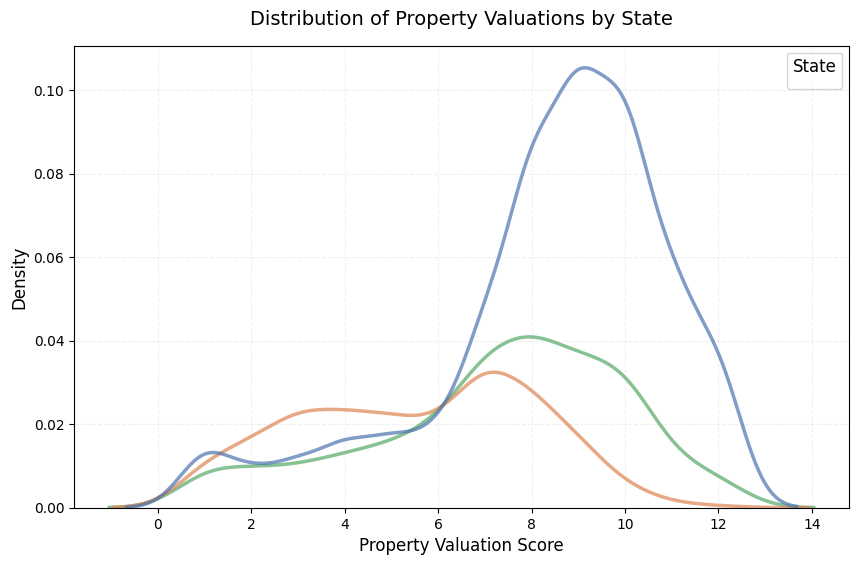

In [112]:
#Property valuation distribution by state
plt.figure(figsize=(10, 6))
sns.kdeplot(data=cust_add, x='property_valuation', hue='state', 
            palette='deep', linewidth=2.5, alpha=0.7)
plt.title('Distribution of Property Valuations by State', fontsize=14, pad=15)
plt.xlabel('Property Valuation Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(alpha=0.2, linestyle='--')
plt.legend(title='State', title_fontsize=12, fontsize=10)

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]),
 [Text(0, 0.0, '0'),
  Text(0, 250.0, '250'),
  Text(0, 500.0, '500'),
  Text(0, 750.0, '750'),
  Text(0, 1000.0, '1000'),
  Text(0, 1250.0, '1250'),
  Text(0, 1500.0, '1500'),
  Text(0, 1750.0, '1750'),
  Text(0, 2000.0, '2000'),
  Text(0, 2250.0, '2250')])

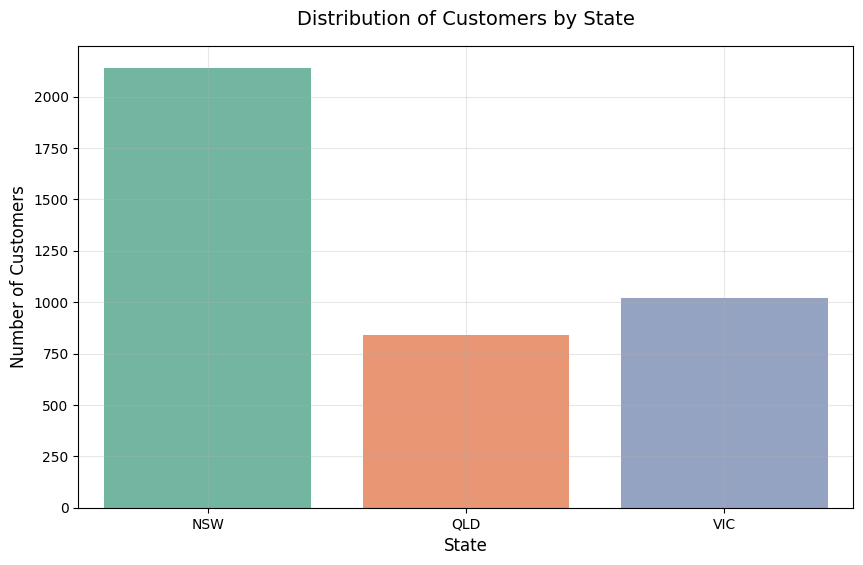

In [113]:
#Distribution of  Customer by State
plt.figure(figsize=(10,6))
sns.countplot(data=cust_add, x='state', palette='Set2')
plt.title('Distribution of Customers by State', fontsize=14, pad=15)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

- The majority of customers are in (NSW)
--> The dominant market with higher population density and stability GPD

<h2>3. Transactions<h2>

In [114]:
trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000041245,17.87
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 00:00:00.000041701,1702.55
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 00:00:00.000036361,1544.61
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 00:00:00.000036145,817.36
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 00:00:00.000042226,1055.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1970-01-01 00:00:00.000037823,802.26
19996,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,1970-01-01 00:00:00.000035560,104.24
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1970-01-01 00:00:00.000040410,1592.19
19998,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1970-01-01 00:00:00.000038216,91.15


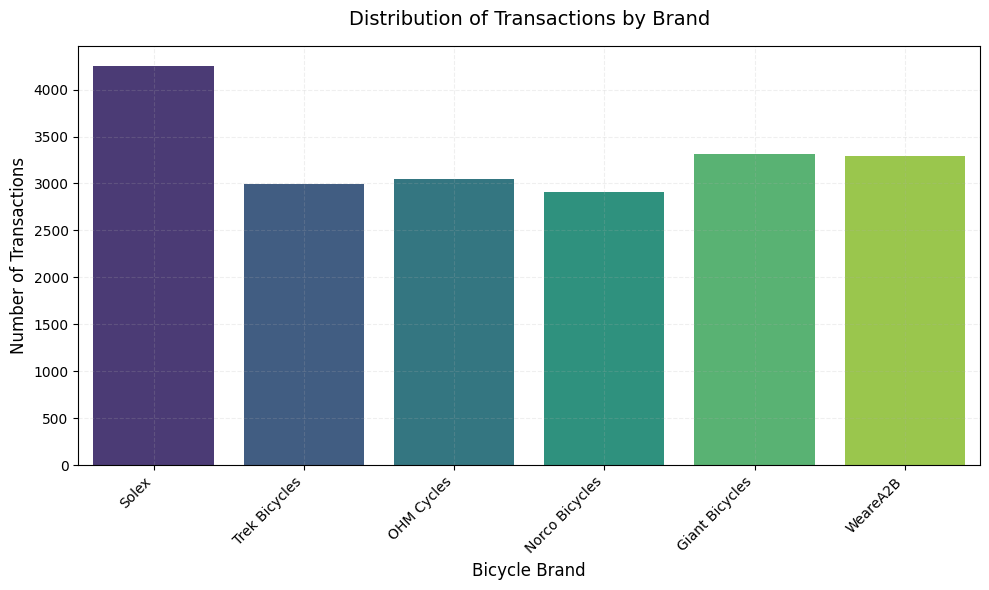

In [115]:
#Distribution of transactions by brand
plt.figure(figsize=(10, 6))
sns.countplot(data=trans, x='brand', palette='viridis')
plt.title('Distribution of Transactions by Brand', fontsize=14, pad=15)
plt.xlabel('Bicycle Brand', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.2, linestyle='--')
plt.tight_layout()

Comments:

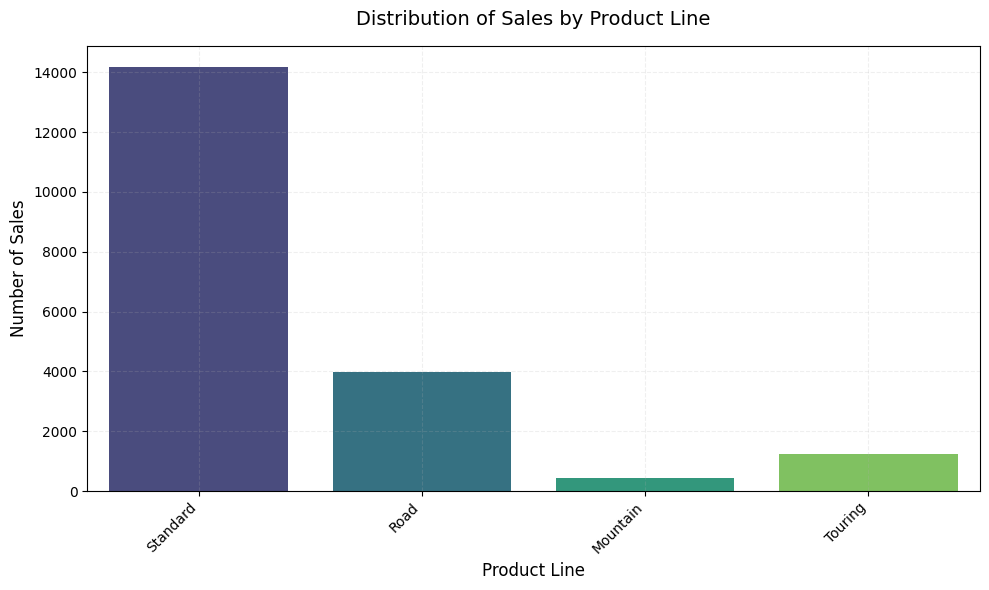

In [116]:
#Distribution of sales by product line
plt.figure(figsize=(10, 6))
sns.countplot(data=trans, x='product_line', palette='viridis')
plt.title('Distribution of Sales by Product Line', fontsize=14, pad=15)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.2, linestyle='--')
plt.tight_layout()

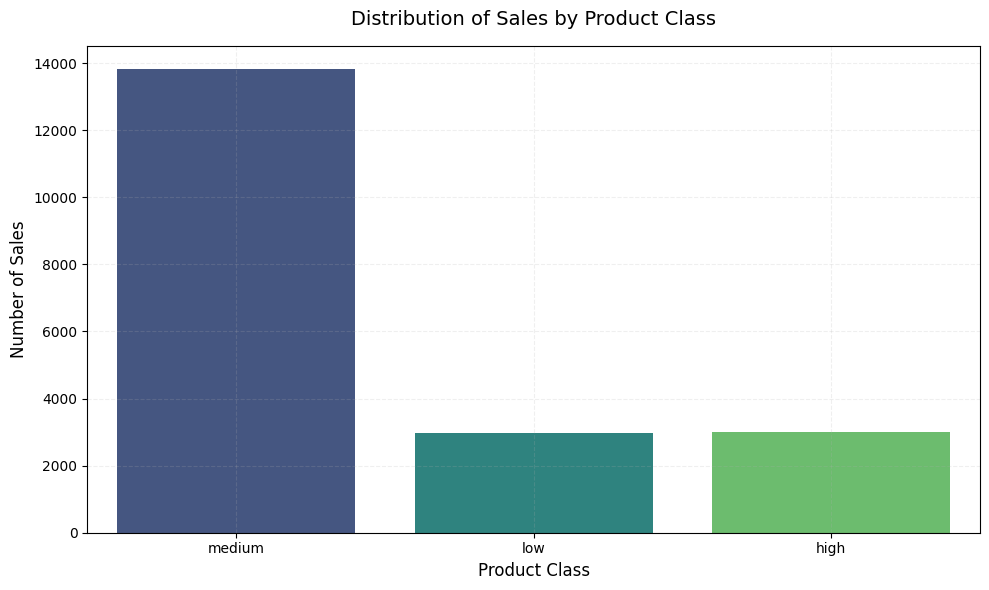

In [117]:
#Distribution of sales by product class
plt.figure(figsize=(10, 6))
sns.countplot(data=trans, x='product_class', palette='viridis')
plt.title('Distribution of Sales by Product Class', fontsize=14, pad=15)
plt.xlabel('Product Class', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.grid(alpha=0.2, linestyle='--')
plt.tight_layout()

Comment:

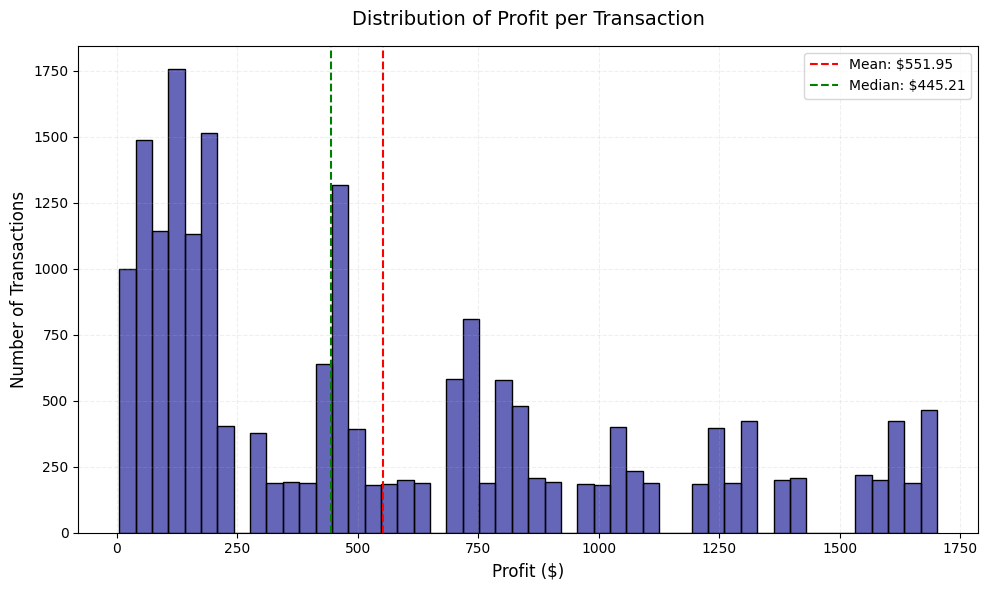

In [118]:
# Distribution of profit
plt.figure(figsize=(10, 6))
sns.histplot(data=trans, x='profit', bins=50, color='darkblue', alpha=0.6)
plt.title('Distribution of Profit per Transaction', fontsize=14, pad=15)
plt.xlabel('Profit ($)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(alpha=0.2, linestyle='--')
plt.axvline(trans['profit'].mean(), color='red', linestyle='--', label=f'Mean: ${trans["profit"].mean():.2f}')
plt.axvline(trans['profit'].median(), color='green', linestyle='--', label=f'Median: ${trans["profit"].median():.2f}')
plt.legend()
plt.tight_layout()

Comment:

In [119]:
trans['list_price'].astype(float)
trans['standard_cost'].astype(float)
trans['profit'].astype(float)

0          17.87
1        1702.55
2        1544.61
3         817.36
4        1055.82
          ...   
19995     802.26
19996     104.24
19997    1592.19
19998      91.15
19999     195.34
Name: profit, Length: 19803, dtype: float64

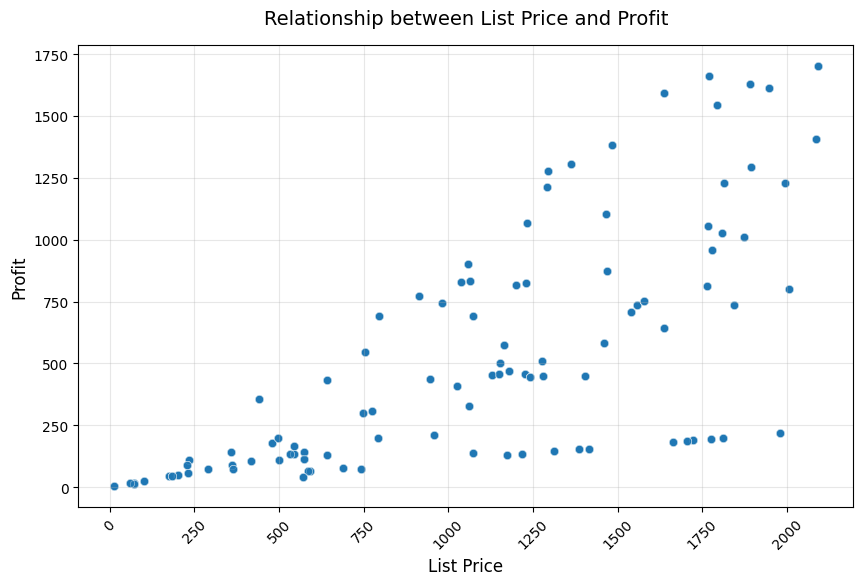

In [120]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=trans, x='list_price', y='profit', alpha=0.5)
plt.title('Relationship between List Price and Profit', fontsize=14, pad=15)
plt.xlabel('List Price', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.locator_params(axis='x', nbins=10)
plt.show()

Positive Correlation
- List price increases, profit also increases.

Clusters and Outliers

- A visible cluster of points exists around the mid-range list prices (500–1000), indicating a concentration of sales in this range.
- Some products with high list prices (1500–2000) exhibit extremely high profits, while others do not, suggesting that profit margins depend on other factors (e.g., discounts, production costs, demand).

--> Target Mid-High Range Pricing: The 500–1500 range appears to be a key segment, where both list price and profit are relatively strong

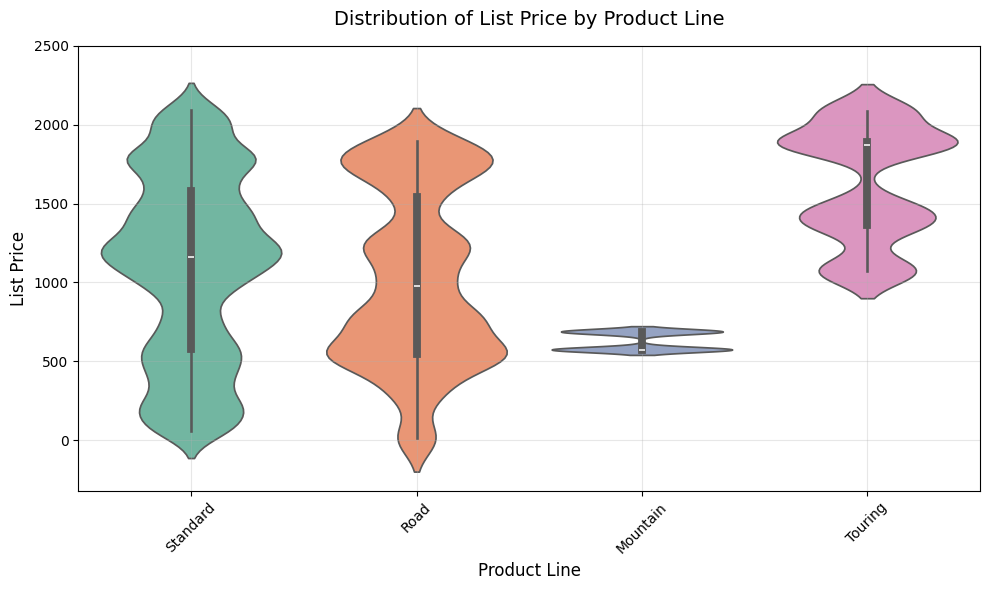

In [121]:
plt.figure(figsize=(10,6))
sns.violinplot(data=trans, x="product_line", y="list_price", palette='Set2')
plt.title('Distribution of List Price by Product Line', fontsize=14, pad=15)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('List Price', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 3000, 500)) 
plt.grid(alpha=0.3)
plt.tight_layout()

- Standard and Road bikes have a wide price rangem from low to high values (approximately from 0 to above 2000)
- Mountain bikes have a narrower price range, mostly concentrated between 500 and 750.

- Standard and Road bikes have a bimodal distribution, indicating two common price points—one at the lower end and another at the higher end --> cater to both budget-conscious and premium customers

- Mountain bikes have a more uniform and condensed price distribution, suggesting fewer price variations in this category --> competitive pricing strategies and product differentiation

- Touring bikes have a tight clustering at the higher price range, implying a premium product category with limited pricing flexibility --> focus on high-value customers and exclusive promotions

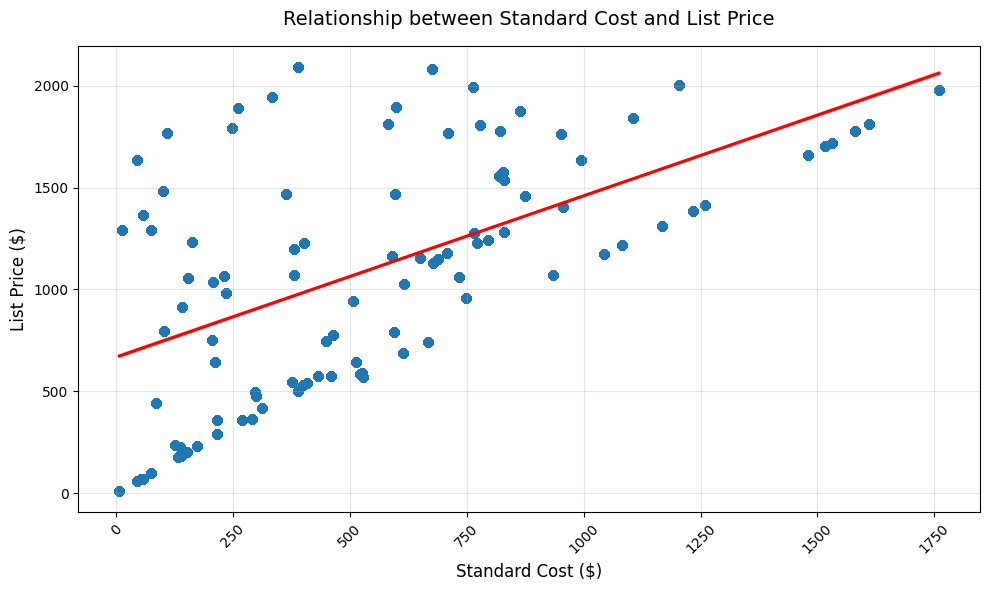

In [122]:
plt.figure(figsize=(10,6))
sns.regplot(data=trans, x="standard_cost", y="list_price", scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Relationship between Standard Cost and List Price', fontsize=14, pad=15)
plt.xlabel('Standard Cost ($)', fontsize=12)
plt.ylabel('List Price ($)', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

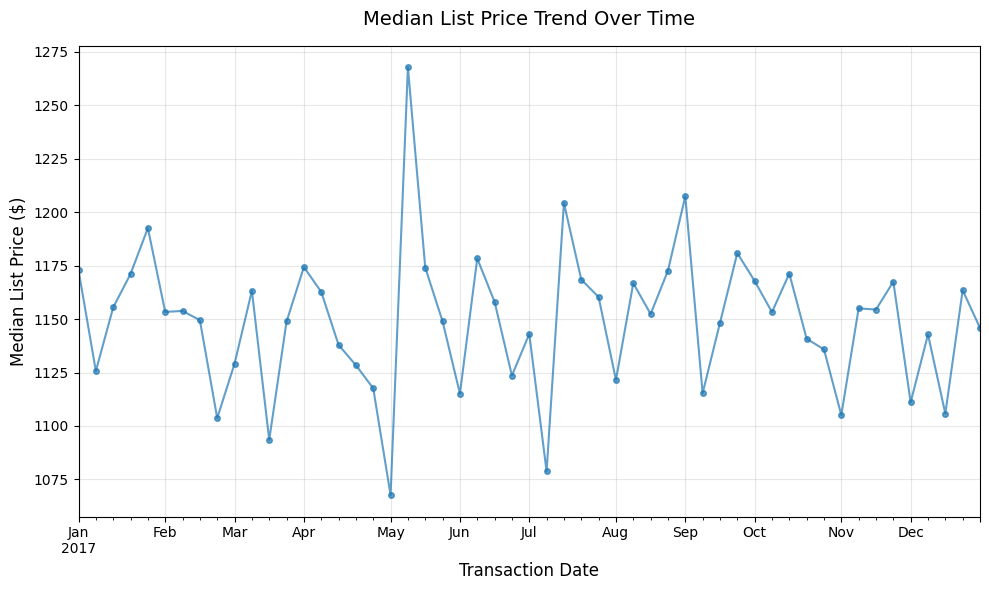

In [123]:
# Plot median price trend over time
plt.figure(figsize=(10,6))
price_trend = trans.groupby("transaction_date")["list_price"].median().resample('W').mean() # Resample to weekly averages
price_trend.plot(marker='o', linestyle='-', markersize=4, alpha=0.7)
plt.title('Median List Price Trend Over Time', fontsize=14, pad=15)
plt.xlabel('Transaction Date', fontsize=12)
plt.ylabel('Median List Price ($)', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# III. Customers Segmentation using RFM method

At this phase of the analysis, customer segmentation was conducted by creating an RFM model. The RFM (Recency, Frequency, Monetary) analysis is a behavioral method that categorizes customers into distinct segments based on their past purchasing activities. It classifies customers according to the timing of their most recent purchase, how often they buy, and the total amount they spend.

<h2>Recency<h2>

The transaction dataset contains all the transaction of customers from 1 Jan 2017 to 30 Dec 2017, so we will choose 30 Dec 2017 as the most recent date to calculate the recency

In [124]:
#Extract recency feature
df_recency = trans.groupby('customer_id', as_index=False)['transaction_date'].max()
df_recency.columns = ['Customer ID', 'Last Transaction Date']
reference_date = df_recency['Last Transaction Date'].max()
df_recency['Recency'] = df_recency['Last Transaction Date'].apply(lambda x: (reference_date - x).days)
df_recency

,Customer ID,Last Transaction Date,Recency
0,1,2017-12-23,7
1,2,2017-08-24,128
2,3,2017-09-19,102
3,4,2017-06-18,195
4,5,2017-12-14,16
...,...,...,...
3489,3497,2017-11-08,52
3490,3498,2017-08-25,127
3491,3499,2017-11-09,51
3492,3500,2017-08-08,144


<h2>Frequency<h2>

The frequency element demonstrates how often a customer purchases a product from the company

In [125]:
#Extract frequency feature
df_frequency = trans.groupby('customer_id', as_index=False)['product_id'].count()
df_frequency.columns = ['Customer ID', 'Frequency']
df_frequency

,Customer ID,Frequency
0,1,11
1,2,3
2,3,8
3,4,2
4,5,6
...,...,...
3489,3497,3
3490,3498,6
3491,3499,7
3492,3500,6


<h2>Monetary<h2>

In [126]:
df_monetary = trans.groupby('customer_id', as_index=False)['list_price'].sum()
df_monetary.columns = ['Customer ID', 'Monetary']
df_monetary

,Customer ID,Monetary
0,1,9084.45
1,2,4149.07
2,3,9888.23
3,4,1047.72
4,5,5903.20
...,...,...
3489,3497,3744.07
3490,3498,5177.06
3491,3499,7673.48
3492,3500,4922.41


In [127]:
#Merging 3 df together based on Customer ID
rf_df = df_recency.merge(df_frequency, on='Customer ID')
rfm_df = rf_df.merge(df_monetary, on='Customer ID').drop(
	columns='Last Transaction Date')
rfm_df.head()

,Customer ID,Recency,Frequency,Monetary
0,1,7,11,9084.45
1,2,128,3,4149.07
2,3,102,8,9888.23
3,4,195,2,1047.72
4,5,16,6,5903.20


<h2>RFM Score Calculation<h2>

We would use weight average method to calculate and rank the RFM score for each customer

In [128]:
# Dividing the recency, frequency and monetary into 4 quartiles (min, 25%, 50%, 75% and max).
# These values will help us to calculate RFM score for a customer and classify based on their RFM score.

rfm_df['r_quartile'] = pd.qcut(rfm_df['Recency'], 4,  ['4','3','2','1'])
rfm_df['f_quartile'] = pd.qcut(rfm_df['Frequency'], 4, ['1', '2', '3', '4'] )
rfm_df['m_quartile'] = pd.qcut(rfm_df['Monetary'], 4, ['1', '2', '3', '4'])

In [129]:
#Calculate the RFM score with the following weightage: recency = 100, frequency = 10, and monetory = 1
rfm_df['rfm_score'] = 100*rfm_df['r_quartile'].astype(int)+10*rfm_df['f_quartile'].astype(int)+rfm_df['m_quartile'].astype(int)
rfm_df

,Customer ID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,rfm_score
0,1,7,11,9084.45,4,4,4,444
1,2,128,3,4149.07,1,1,1,111
2,3,102,8,9888.23,1,4,4,144
3,4,195,2,1047.72,1,1,1,111
4,5,16,6,5903.20,4,2,2,422
...,...,...,...,...,...,...,...,...
3489,3497,52,3,3744.07,2,1,1,211
3490,3498,127,6,5177.06,1,2,2,122
3491,3499,51,7,7673.48,2,3,3,233
3492,3500,144,6,4922.41,1,2,2,122


In [130]:
# Assigning a title to a customer
# Platinum corresponds to highest range of RFM score down to Bronze to lowest range of RFM score.

rfm_df['customer_title'] = pd.qcut(rfm_df['rfm_score'], 4, ['Bronze','Silver','Gold','Platinum'])
rfm_df

,Customer ID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
0,1,7,11,9084.45,4,4,4,444,Platinum
1,2,128,3,4149.07,1,1,1,111,Bronze
2,3,102,8,9888.23,1,4,4,144,Bronze
3,4,195,2,1047.72,1,1,1,111,Bronze
4,5,16,6,5903.20,4,2,2,422,Platinum
...,...,...,...,...,...,...,...,...,...
3489,3497,52,3,3744.07,2,1,1,211,Bronze
3490,3498,127,6,5177.06,1,2,2,122,Bronze
3491,3499,51,7,7673.48,2,3,3,233,Silver
3492,3500,144,6,4922.41,1,2,2,122,Bronze


<h2>Customer Title and Ranking<h2>

We will assign title and ranking for each customer based on their RFM score with the following bins: 
- Platinum Customers: RFM ≥ 444
- Very Loyal Customers: 433 ≤ RFM < 444
- Becoming Loyal: 421 ≤ RFM < 433
- Recent Customers: 344 ≤ RFM < 421
- Potential Customers: 323 ≤ RFM < 344
- Late Bloomer: 311 ≤ RFM < 323
- Losing Customers: 224 ≤ RFM < 311
- High Risk Customers: 212 ≤ RFM < 244
- Almost lost Customers: 124 ≤ RFM < 212
- Evasive Customers: 112 ≤ RFM < 124
- Lost Customers: RFM < 112


In [131]:
# Define the RFM score ranges and corresponding titles and ranks
rfm_segments = [
    (444, float('inf'), 'Platinum Customers', 1),
    (433, 444, 'Very Loyal Customers', 2),
    (421, 433, 'Becoming Loyal', 3),
    (344, 421, 'Recent Customers', 4),
    (323, 344, 'Potential Customers', 5),
    (311, 323, 'Late Bloomer', 6),
    (224, 311, 'Losing Customers', 7),
    (212, 244, 'High Risk Customers', 8),
    (124, 212, 'Almost lost Customers', 9),
    (112, 124, 'Evasive Customers', 10),
    (0, 112, 'Lost Customers', 11)
]

# Function to assign title and rank based on RFM score
def assign_segment(rfm_score):
    for lower, upper, title, rank in rfm_segments:
        if lower <= rfm_score <= upper:
            return title, rank
    return 'Unknown', 12  # Default for scores not in any range

# Apply the function to the DataFrame
rfm_df[['Segment Title', 'Segment Rank']] = rfm_df['rfm_score'].apply(
    lambda x: pd.Series(assign_segment(x))
)

# Display the updated DataFrame
rfm_df

,Customer ID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title,Segment Title,Segment Rank
0,1,7,11,9084.45,4,4,4,444,Platinum,Platinum Customers,1
1,2,128,3,4149.07,1,1,1,111,Bronze,Lost Customers,11
2,3,102,8,9888.23,1,4,4,144,Bronze,Almost lost Customers,9
3,4,195,2,1047.72,1,1,1,111,Bronze,Lost Customers,11
4,5,16,6,5903.20,4,2,2,422,Platinum,Becoming Loyal,3
...,...,...,...,...,...,...,...,...,...,...,...
3489,3497,52,3,3744.07,2,1,1,211,Bronze,Almost lost Customers,9
3490,3498,127,6,5177.06,1,2,2,122,Bronze,Evasive Customers,10
3491,3499,51,7,7673.48,2,3,3,233,Silver,Losing Customers,7
3492,3500,144,6,4922.41,1,2,2,122,Bronze,Evasive Customers,10


# IV. RFM Analysis

We will conduct EDA with the customer segments we just have created

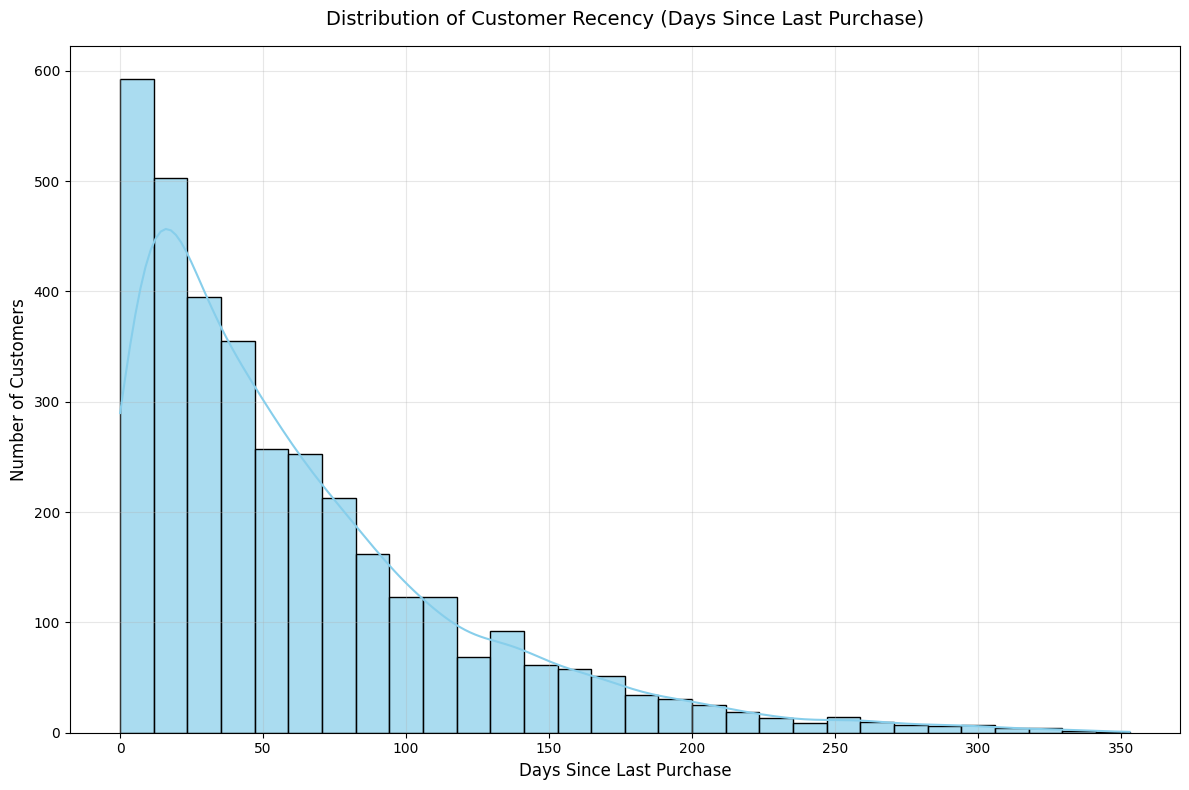

In [132]:
# Create a figure with larger size
plt.figure(figsize=(12, 8))

# Create histogram with customized style
sns.histplot(data=rfm_df, x="Recency", kde=True, bins=30, 
             color='skyblue', edgecolor='black', alpha=0.7)

# Customize the plot
plt.title('Distribution of Customer Recency (Days Since Last Purchase)', 
          fontsize=14, pad=15)
plt.xlabel('Days Since Last Purchase', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

Right-Skewed Distribution
- Most customers have made a purchase recently (low recency values, close to 0–20 days), while fewer customers have not purchased for a long time
- Very few customers have a recency value above 150–200 days --> long-inactive customers are rare

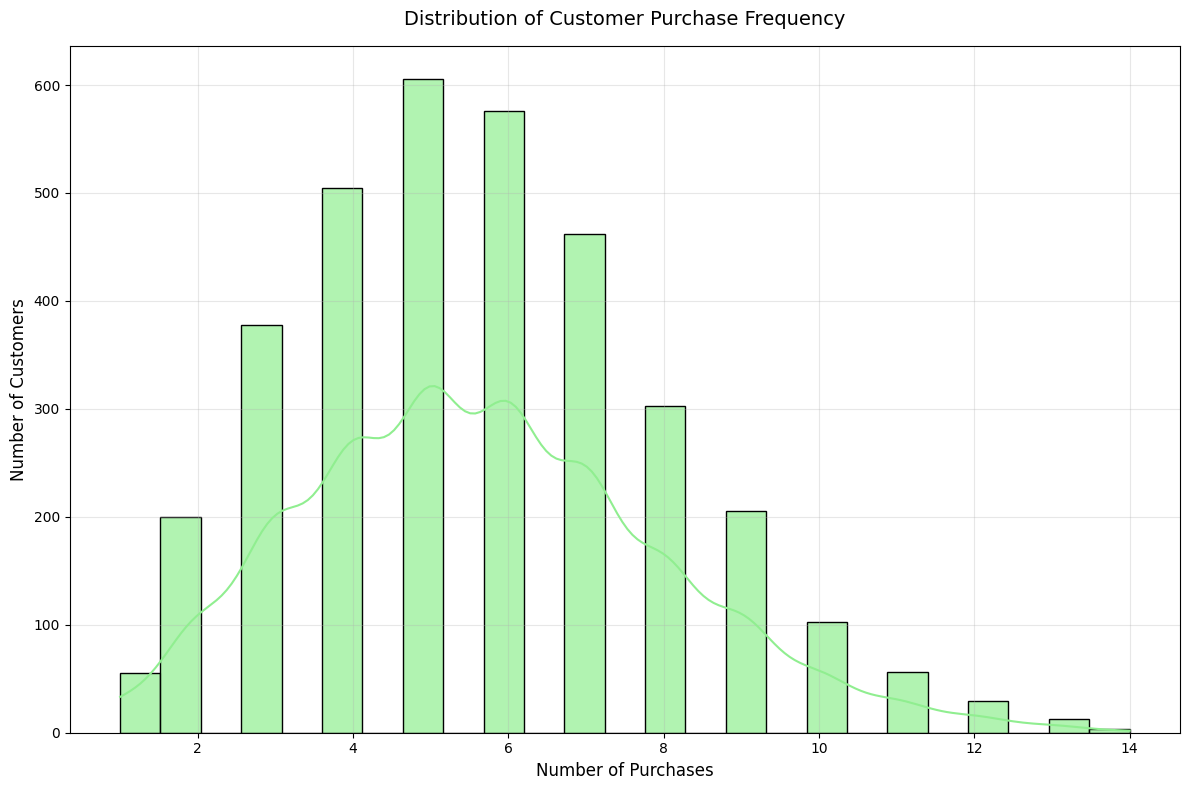

In [133]:
# Create a figure with larger size
plt.figure(figsize=(12, 8))

# Create histogram with customized style
sns.histplot(data=rfm_df, x="Frequency", kde=True, bins=25,
             color='lightgreen', edgecolor='black', alpha=0.7)

# Customize the plot
plt.title('Distribution of Customer Purchase Frequency', 
          fontsize=14, pad=15)
plt.xlabel('Number of Purchases', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

Normal-like Distribution (Slight Right-Skew)
- Most customers purchase 4 - 8 times, with 6 times is the highest
- A slight right skew: a small number of customers make very frequent purchases (above 10 times)

--> Create incentives (discounts, bundling, or loyalty points) or programs for loyal customers

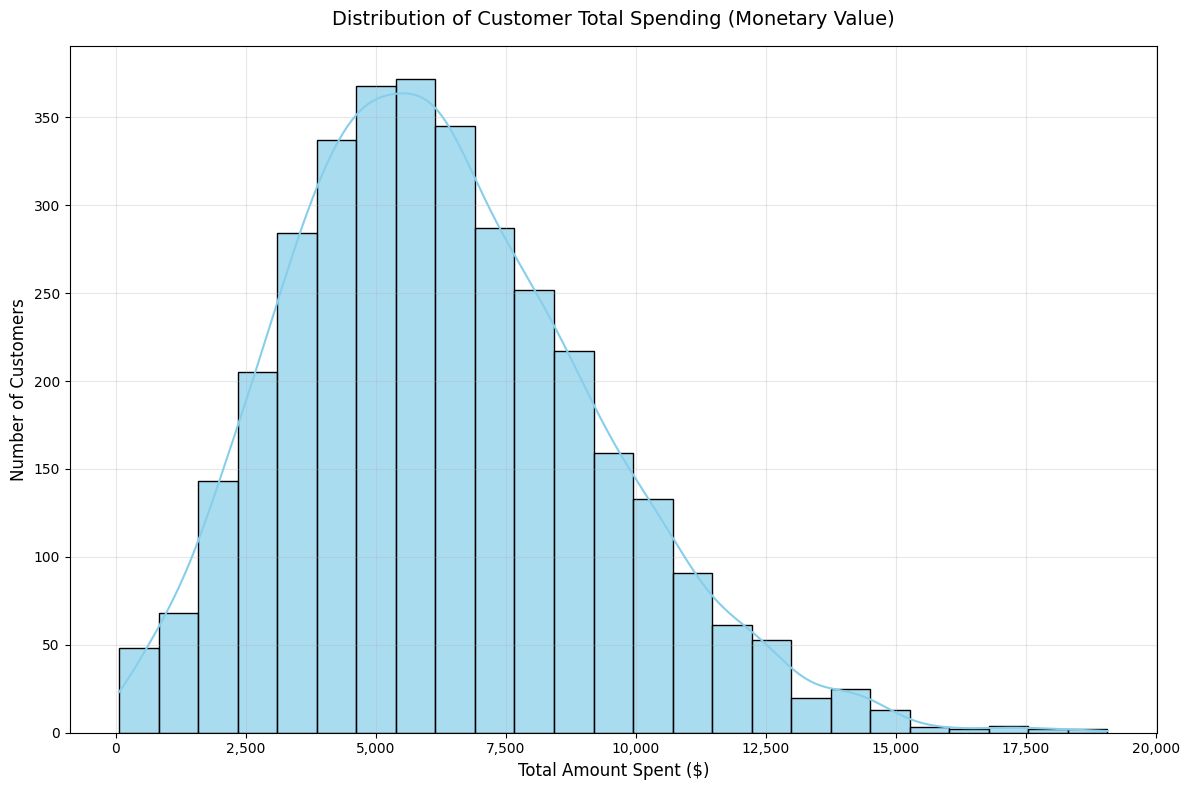

In [134]:
# Create a figure with larger size
plt.figure(figsize=(12, 8))

# Create histogram with customized style
sns.histplot(data=rfm_df, x="Monetary", kde=True, bins=25,
             color='skyblue', edgecolor='black', alpha=0.7)

# Customize the plot
plt.title('Distribution of Customer Total Spending (Monetary Value)', 
          fontsize=14, pad=15)
plt.xlabel('Total Amount Spent ($)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Format x-axis labels to show thousands with comma
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Adjust layout
plt.tight_layout()

Right-Skewed Distribution
- Most customers willing to pay a moderate value of money
- The majority of customers pays between 4,000 and 7,500, with the peak around 5,000.

--> Offering complementary products to mid-range spenders can push them toward higher spending tiers.

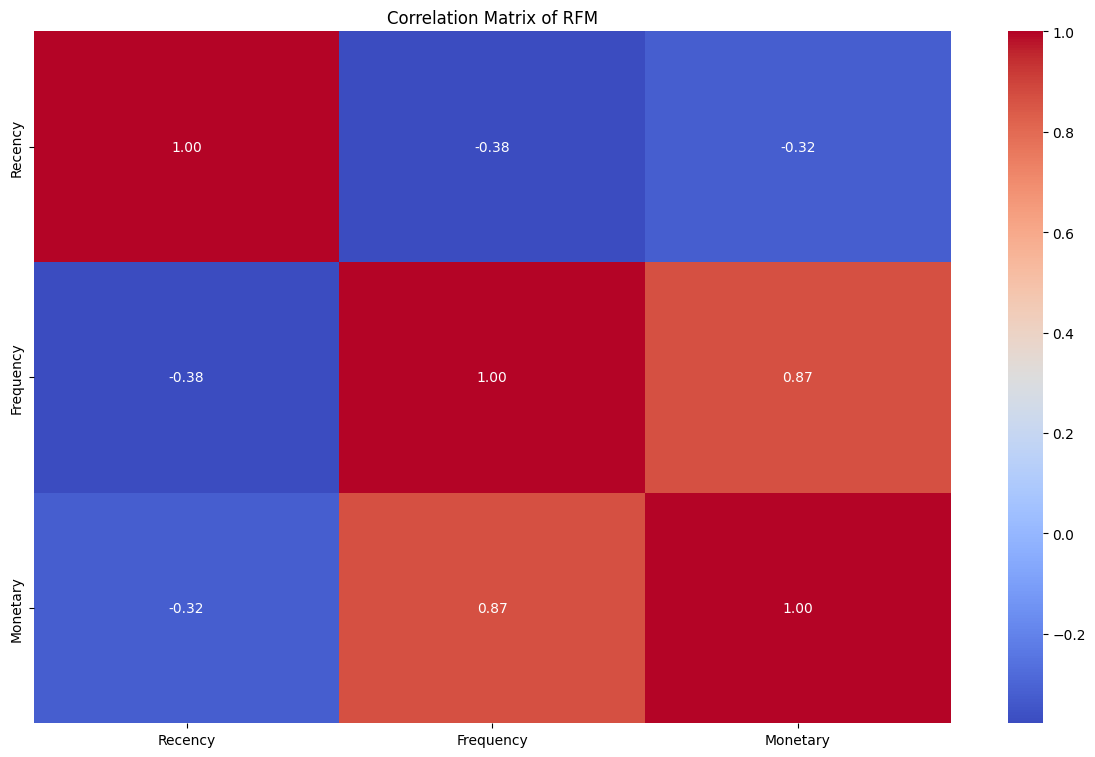

In [135]:
# Correlation matrix
fig_corr, ax_corr = plt.subplots(figsize=(12, 8))
# Select only RFM columns for correlation
rfm_cols = ['Recency', 'Frequency', 'Monetary']
corr_matrix = rfm_df[rfm_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=ax_corr)
ax_corr.set_title("Correlation Matrix of RFM")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

1. Strong Positive Correlation Between Frequency and Monetary (0.87)

- Customers who purchase more frequently spend more money overall.
--> Repeat customers are high-value customers, meaning retention strategies (such as loyalty programs, personalized discounts, and engagement campaigns) could boost overall revenue.

2. Negative Correlation Between Recency and Frequency (-0.38)

- Customers who purchase more frequently also tend to have more recent transactions.
--> Re-engage customers with high past frequency but recent inactivity through targeted campaigns (email reminders, special discounts, or reactivation offers).

3.Negative Correlation Between Recency and Monetary (-0.32)
- High-spending customers tend to stay active.
--> High-value customers who become inactive should be quickly identified and re-engaged through exclusive offers, VIP benefits, or reminders of their past purchases.

Text(0, 0.5, 'Monetary')

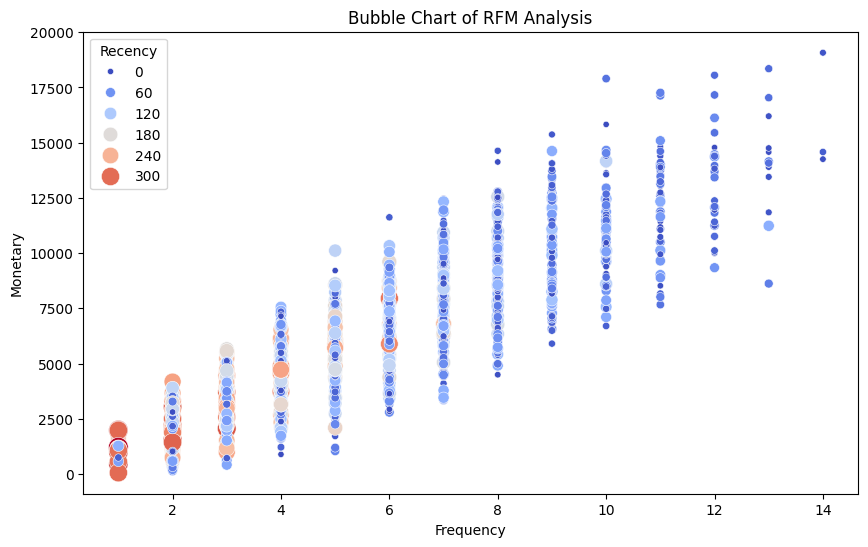

In [136]:
# Bubble Chart
fig_bubble, ax_bubble = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x="Frequency", y="Monetary", size="Recency", hue="Recency", sizes=(20, 200), palette="coolwarm", ax=ax_bubble)
ax_bubble.set_title("Bubble Chart of RFM Analysis")
ax_bubble.set_xlabel("Frequency")
ax_bubble.set_ylabel("Monetary")

- Customers who purchase more frequently tend to spend more
- Darker blue bubbles (lower recency values) are more concentrated at higher frequency and monetary values. Red and larger bubbles (higher recency values, meaning they haven't purchased in a long time) are clustered at low frequency and monetary levels.
--> High-value customers tend to shop more recently, while dormant customers have lower transaction amounts and frequencies.

=> Re-engage inactive customers through personalized offers and email campaigns

In [137]:
rfm_df.to_csv('rfm_df.csv', index=False)

<h2>Customer Segments Analysis<h2>

We need to join the transaction dataset and the currently created RFM dataset to conduct further customer segment analysis

In [142]:
#Change the column name in rfm_df from 'Customer ID' to 'customer_id'
rfm_df = rfm_df.rename(columns={'Customer ID': 'customer_id'})

In [143]:
customer_segmentation = pd.merge(trans, rfm_df, on='customer_id', how='left')
customer_segmentation

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title,Segment Title,Segment Rank
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,75,3,1953.15,2,1,1,211,Bronze,Almost lost Customers,9
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,20,7,7351.70,3,3,3,333,Gold,Potential Customers,5
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,...,56,6,8148.22,2,2,4,224,Silver,Losing Customers,7
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,...,121,7,7539.81,1,3,3,133,Bronze,Almost lost Customers,9
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,...,75,10,11292.54,2,4,4,244,Silver,Losing Customers,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19798,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,...,26,5,6164.88,3,2,3,323,Gold,Potential Customers,5
19799,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,...,23,10,9949.62,3,4,4,344,Gold,Recent Customers,4
19800,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,...,34,7,7556.94,3,3,3,333,Gold,Potential Customers,5
19801,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,...,51,3,1639.08,2,1,1,211,Bronze,Almost lost Customers,9


<h3>Customer Segments vs. Product Line & Product Class<h3>

We will examine the relationship between each customer segment and product line, produdct class

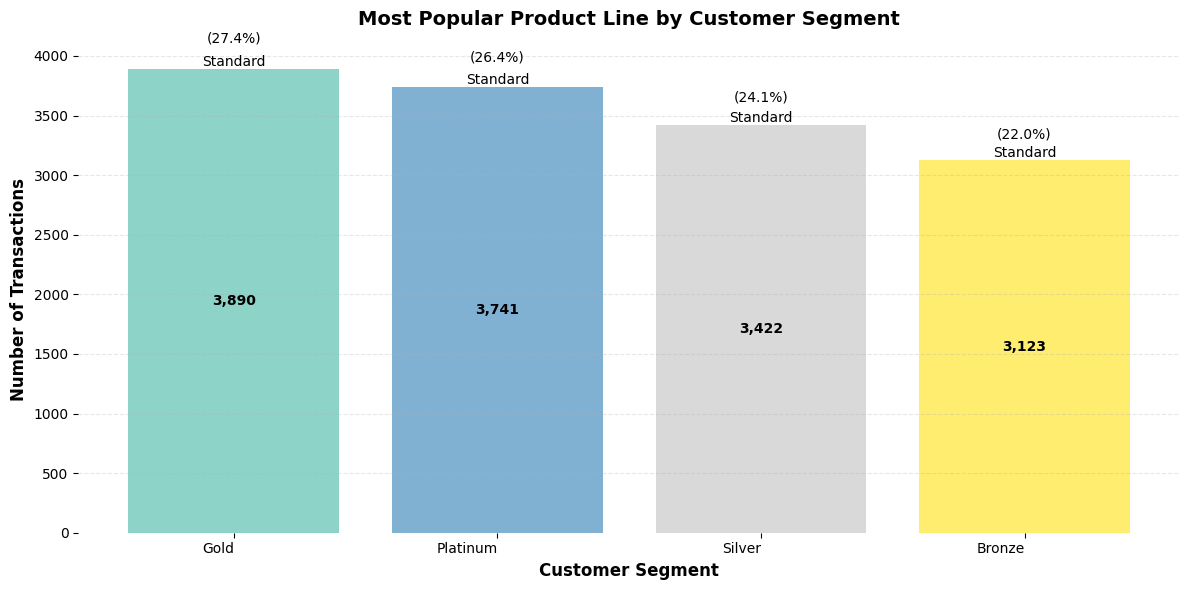

In [170]:
# Find the most purchased product line for each segment
most_popular_products = customer_segmentation.groupby('customer_title')['product_line'].agg(
    lambda x: x.value_counts().index[0]).reset_index()
product_counts = customer_segmentation.groupby(['customer_title', 'product_line']).size().reset_index(name='count')

# Get the counts for the most popular product lines
result = pd.merge(most_popular_products, product_counts, 
                 on=['customer_title', 'product_line'])

# Sort by count descending
result = result.sort_values('count', ascending=False)

# Set style and colors
colors = plt.cm.Set3(np.linspace(0, 1, len(result)))

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(result['customer_title'], result['count'], color=colors)

# Customize appearance
plt.xticks(ha='right')
plt.title('Most Popular Product Line by Customer Segment', fontsize=14, pad=15, fontweight='bold')
plt.xlabel('Customer Segment', fontsize=12, fontweight='bold')
plt.ylabel('Number of Transactions', fontsize=12, fontweight='bold')

# Add value labels and product line labels
for bar in bars:
    height = bar.get_height()
    product_line = result.loc[result['count'] == height, 'product_line'].iloc[0]
    
    # Add count on bar
    plt.text(bar.get_x() + bar.get_width()/2., height/2,
             f'{int(height):,}',
             ha='center', va='center',
             color='black', fontweight='bold')
    
    # Add product line above bar
    plt.text(bar.get_x() + bar.get_width()/2., height,
             product_line,
             ha='center', va='bottom',
             color='black', fontsize=10)

# Customize grid and spines
plt.grid(axis='y', alpha=0.3, linestyle='--')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Add percentage labels
total = result['count'].sum()
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = height/total * 100
    plt.text(bar.get_x() + bar.get_width()/2., height*1.05,
             f'({percentage:.1f}%)',
             ha='center', va='bottom',
             color='black', fontsize=10)

plt.tight_layout()
plt.show()

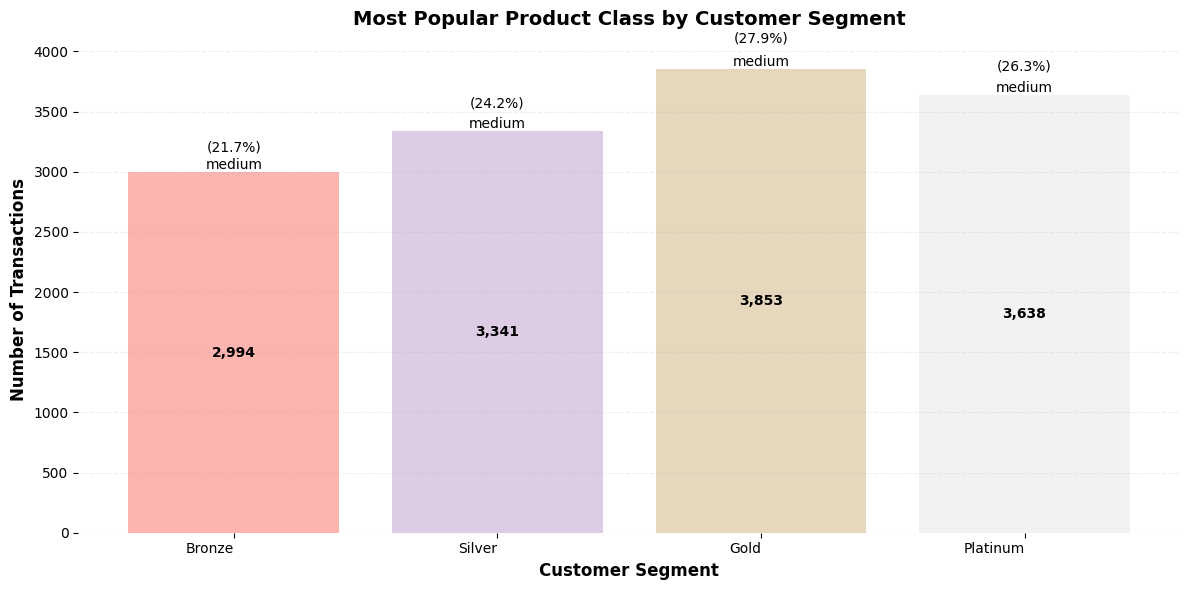

In [168]:
# Find the most purchased product class for each segment
most_popular_class = customer_segmentation.groupby('customer_title')['product_class'].agg(
    lambda x: x.value_counts().index[0]).reset_index()
class_counts = customer_segmentation.groupby(['customer_title', 'product_class']).size().reset_index(name='count')

# Get the counts for the most popular product classes
result = pd.merge(most_popular_class, class_counts, 
                 on=['customer_title', 'product_class'])

# Set style and colors
colors = plt.cm.Pastel1(np.linspace(0, 1, len(result)))

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(result['customer_title'], result['count'], color=colors)

# Customize appearance
plt.xticks(ha='right')
plt.title('Most Popular Product Class by Customer Segment', 
         fontsize=14, pad=15, fontweight='bold')
plt.xlabel('Customer Segment', fontsize=12, fontweight='bold')
plt.ylabel('Number of Transactions', fontsize=12, fontweight='bold')

# Add value labels and product class labels
for bar in bars:
    height = bar.get_height()
    product_class = result.loc[result['count'] == height, 'product_class'].iloc[0]
    
    # Add count on bar
    plt.text(bar.get_x() + bar.get_width()/2., height/2,
             f'{int(height):,}',
             ha='center', va='center',
             color='black', fontweight='bold')
    
    # Add product class above bar
    plt.text(bar.get_x() + bar.get_width()/2., height,
             product_class,
             ha='center', va='bottom',
             color='black', fontsize=10)

# Customize grid and spines
plt.grid(axis='y', alpha=0.2, linestyle='--')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Add percentage labels
total = result['count'].sum()
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = height/total * 100
    plt.text(bar.get_x() + bar.get_width()/2., height*1.05,
             f'({percentage:.1f}%)',
             ha='center', va='bottom',
             color='black', fontsize=10)

plt.tight_layout()
plt.show()

Now we will examine the number of customers in each Customer Segments and how much Sales they contribute for the company.

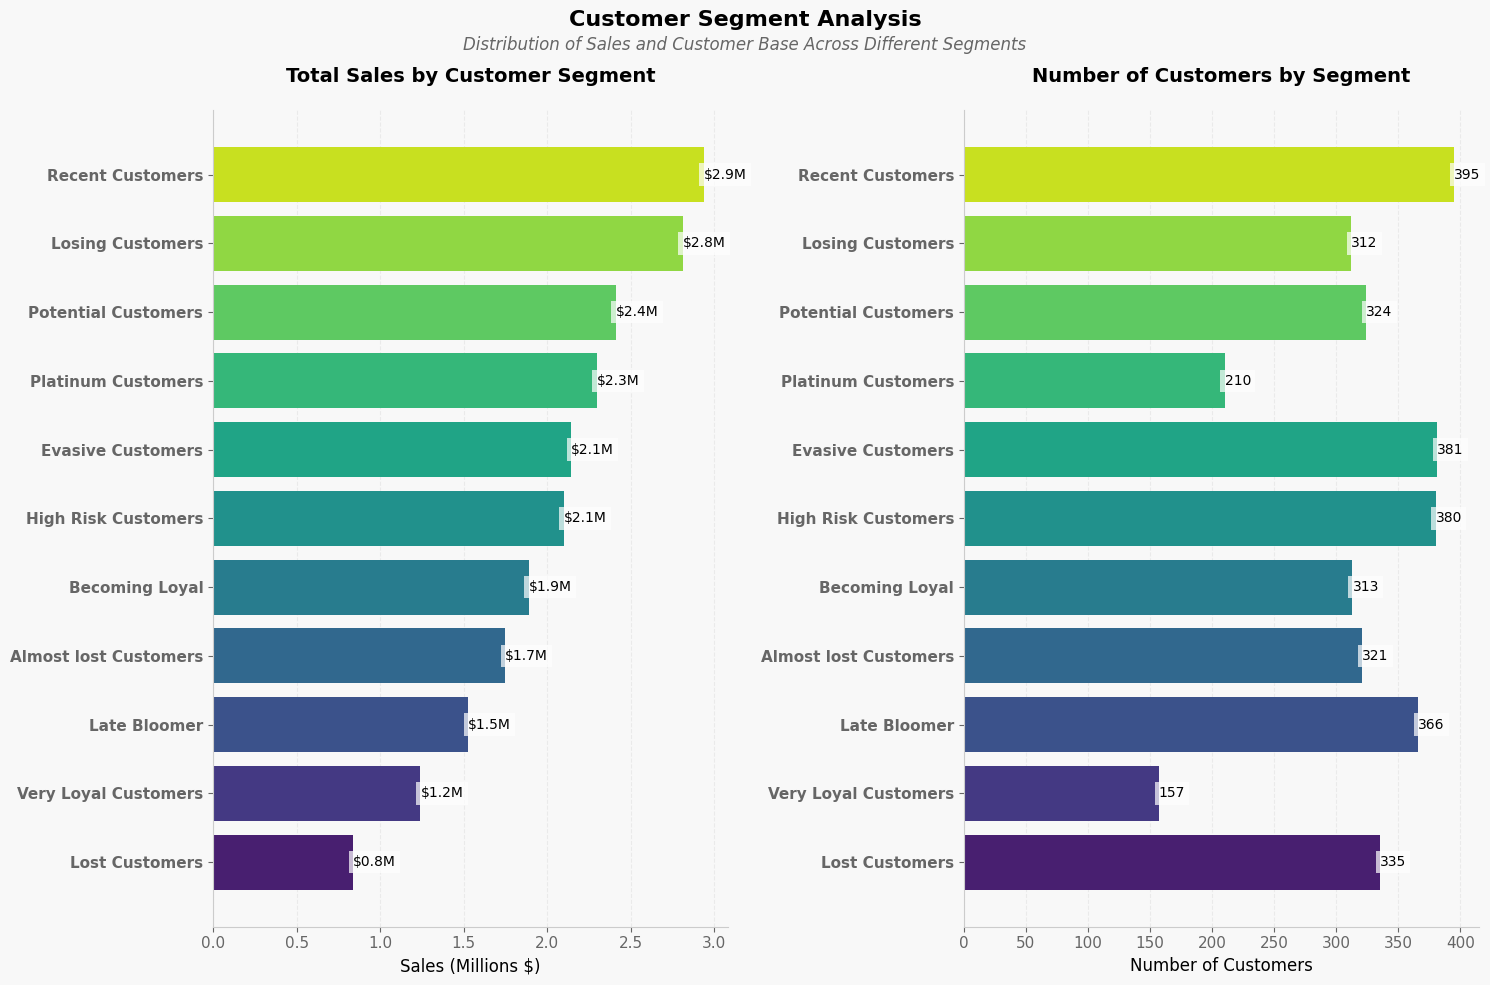

In [163]:
# 1. Number of Customers per Segment
segment_counts = customer_segmentation.groupby('Segment Title')['customer_id'].nunique()
total_customers = segment_counts.sum()

# Calculate percentage of total customers
segment_counts_pct = (segment_counts / total_customers * 100).round(2)

# Create DataFrame for customer counts
customer_analysis = pd.DataFrame({
    'Number of Customers': segment_counts,
    'Percentage of Customers': segment_counts_pct
})

# 2. Sales (List Price) Analysis
segment_sales = customer_segmentation.groupby('Segment Title')['list_price'].sum()
total_sales = segment_sales.sum()
segment_sales_pct = (segment_sales / total_sales * 100).round(2)

# Add sales metrics to analysis DataFrame
customer_analysis['Total Sales'] = segment_sales
customer_analysis['Percentage of Sales'] = segment_sales_pct

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

# Get data for each segment and sort by sales
customer_analysis_sorted = customer_analysis.sort_values('Total Sales', ascending=True)
segments = customer_analysis_sorted.index
sales = customer_analysis_sorted['Total Sales'] / 1000000  # Convert to millions
customers = customer_analysis_sorted['Number of Customers']

# Create a professional color palette
colors = sns.color_palette("viridis", n_colors=len(segments))

# Create horizontal bars for sales
bars1 = ax1.barh(segments, sales, color=colors)
ax1.set_title('Total Sales by Customer Segment', pad=20, fontsize=14, fontweight='bold')
ax1.set_xlabel('Sales (Millions $)', fontsize=12)

# Add value labels with background for sales
for bar in bars1:
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2, 
             f'${width:.1f}M', 
             ha='left', va='center', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=3))
    
# Create horizontal bars for customer count
bars2 = ax2.barh(segments, customers, color=colors)
ax2.set_title('Number of Customers by Segment', pad=20, fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Customers', fontsize=12)

# Add value labels with background for customer count
for bar in bars2:
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2, 
             f'{int(width):,}', 
             ha='left', va='center', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=3))

# Customize the appearance
for ax in [ax1, ax2]:
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Style the remaining spines
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    
    # Customize ticks
    ax.tick_params(labelsize=11, colors='#666666')
    
    # Add subtle grid
    ax.grid(axis='x', linestyle='--', alpha=0.3, color='#CCCCCC')
    ax.set_axisbelow(True)
    
    # Style segment labels
    ax.set_yticklabels(segments, fontweight='bold')

# Add main title with subtitle
fig.suptitle('Customer Segment Analysis\n', fontsize=16, fontweight='bold', y=0.98)
plt.figtext(0.5, 0.94, 'Distribution of Sales and Customer Base Across Different Segments',
            ha='center', fontsize=12, style='italic', color='#666666')

# Add a light background color
fig.patch.set_facecolor('#F8F8F8')
for ax in [ax1, ax2]:
    ax.set_facecolor('#F8F8F8')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Make room for titles
plt.show()
